# Getting Stock Data

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
from datetime import date
import datetime
today = date.today()
today

datetime.date(2021, 12, 3)

In [ ]:
yearback = today -  datetime.timedelta(days=365 *2)
yearback

datetime.date(2019, 12, 4)

In [ ]:
import pandas as pd
SP50 = pd.read_excel("S&P50_companies.xlsx",header = None,names = ["Company","Stock_Symbol"])

In [ ]:
SP50.columns

Index(['Company', 'Stock_Symbol'], dtype='object')

In [ ]:
SP50.head(15)

,Company,Stock_Symbol
0,Microsoft Corp.,MSFT
1,Apple Inc.,AAPL
2,Amazon.com Inc.,AMZN
3,Tesla Inc.,TSLA
4,Alphabet Inc. Class A,GOOGL
5,Alphabet Inc. Class C,GOOG
6,Meta Platforms Inc. Class A,FB
7,NVIDIA Corp.,NVDA
8,Berkshire Hathaway Inc. Class B,BRK.B
9,JPMorgan Chase & Co.,JPM


In [ ]:
stock_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Company','Stock_Symbol'])
for i,row in SP50.iterrows():
  print(row['Company'],row['Stock_Symbol'])
  dataf = yf.download(row['Stock_Symbol'], start=yearback, end=today, progress=False)
  dataf['Company'] = row['Company']
  dataf['Stock_Symbol'] = row['Stock_Symbol']
  print(dataf.head())
  stock_data = stock_data.append(dataf)

Microsoft Corp. MSFT
                  Open        High  ...          Company  Stock_Symbol
Date                                ...                               
2019-12-04  150.139999  150.179993  ...  Microsoft Corp.          MSFT
2019-12-05  150.050003  150.320007  ...  Microsoft Corp.          MSFT
2019-12-06  150.990005  151.869995  ...  Microsoft Corp.          MSFT
2019-12-09  151.070007  152.210007  ...  Microsoft Corp.          MSFT
2019-12-10  151.289993  151.889999  ...  Microsoft Corp.          MSFT

[5 rows x 8 columns]
Apple Inc. AAPL
                 Open       High        Low  ...     Volume     Company  Stock_Symbol
Date                                         ...                                     
2019-12-04  65.267502  65.827499  65.169998  ...   67181600  Apple Inc.          AAPL
2019-12-05  65.947502  66.472504  65.682503  ...   74424400  Apple Inc.          AAPL
2019-12-06  66.870003  67.750000  66.824997  ...  106075600  Apple Inc.          AAPL
2019-12-09  67

In [ ]:
stock_data.shape

(24696, 8)

In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol
2019-12-04,150.139999,150.179993,149.199997,149.850006,147.046631,17574700,Microsoft Corp.,MSFT
2019-12-05,150.050003,150.320007,149.479996,149.929993,147.125107,17869100,Microsoft Corp.,MSFT
2019-12-06,150.990005,151.869995,150.270004,151.750000,148.911057,16403500,Microsoft Corp.,MSFT
2019-12-09,151.070007,152.210007,150.910004,151.360001,148.528351,16687400,Microsoft Corp.,MSFT
2019-12-10,151.289993,151.889999,150.759995,151.130005,148.302643,16476100,Microsoft Corp.,MSFT


In [ ]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol
2021-11-26,249.619995,252.110001,247.149994,247.690002,247.690002,1891000,Lowe's Companies Inc.,LOW
2021-11-29,250.309998,252.490005,248.380005,248.580002,248.580002,3209100,Lowe's Companies Inc.,LOW
2021-11-30,247.759995,250.440002,244.509995,244.589996,244.589996,6235900,Lowe's Companies Inc.,LOW
2021-12-01,248.300003,252.369995,245.220001,245.339996,245.339996,4018600,Lowe's Companies Inc.,LOW
2021-12-02,247.009995,251.679993,245.839996,250.389999,250.389999,3706700,Lowe's Companies Inc.,LOW


In [ ]:
stock_data[stock_data["Stock_Symbol"]== 'LOW']

,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol
2019-12-04,115.000000,117.459999,114.870003,115.459999,111.848053,4147400,Lowe's Companies Inc.,LOW
2019-12-05,115.970001,116.279999,114.959999,115.580002,111.964302,2651200,Lowe's Companies Inc.,LOW
2019-12-06,116.180000,117.320000,116.029999,116.279999,112.642380,2463100,Lowe's Companies Inc.,LOW
2019-12-09,116.330002,118.330002,116.139999,117.870003,114.182655,2589500,Lowe's Companies Inc.,LOW
2019-12-10,117.779999,117.860001,116.379997,116.480003,112.836151,2561600,Lowe's Companies Inc.,LOW
...,...,...,...,...,...,...,...,...
2021-11-26,249.619995,252.110001,247.149994,247.690002,247.690002,1891000,Lowe's Companies Inc.,LOW
2021-11-29,250.309998,252.490005,248.380005,248.580002,248.580002,3209100,Lowe's Companies Inc.,LOW
2021-11-30,247.759995,250.440002,244.509995,244.589996,244.589996,6235900,Lowe's Companies Inc.,LOW
2021-12-01,248.300003,252.369995,245.220001,245.339996,245.339996,4018600,Lowe's Companies Inc.,LOW


In [ ]:
stock_data.reset_index(inplace=True)

In [ ]:
stock_data.to_csv("stock_data_s&p_50_new.csv",sep=',',index=False)

# Getting News from Twitter


In [ ]:
pip install -q snscrape

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas
import os
import pandas as pd
from datetime import date

In [ ]:
today = date.today()
end_date = today

In [ ]:
search_term = 'Google'
since_date = '2019-12-02'
until_date = "2021-11-29"

In [ ]:

def get_searchword_tweets(search_term,since_date,until_date):
  # Creating list to append tweet data to
  tweets_list2 = []

  # Using TwitterSearchScraper to scrape data and append tweets to list
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} since:{} until:{}'.format(search_term,since_date,until_date)).get_items()):
      # if i>5000:
      #     break
      tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])

  # Creating a dataframe from the tweets list above
  tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
  return tweets_df2

In [ ]:

def get_user_tweets(user_name):

  # Creating list to append tweet data
  tweets_list1 = []

  # Using TwitterSearchScraper to scrape data and append tweets to list
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:{}'.format(user_name)).get_items()): #declare a username
      # if i>5000: #number of tweets you want to scrape
      #     break
      tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.username]) #declare the attributes to be returned

  # Creating a dataframe from the tweets list above
  tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
  return tweets_df2

In [ ]:
stock_data['Stock_Symbol'].unique()

array(['MSFT', 'AAPL', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'FB', 'NVDA',
       'JPM', 'JNJ', 'UNH', 'HD', 'PG', 'V', 'BAC', 'ADBE', 'DIS', 'CRM',
       'NFLX', 'MA', 'XOM', 'PYPL', 'TMO', 'PFE', 'CMCSA', 'CSCO', 'ACN',
       'MRK', 'ABT', 'COST', 'PEP', 'AVGO', 'NKE', 'KO', 'CVX', 'WMT',
       'LLY', 'VZ', 'WFC', 'ABBV', 'INTC', 'DHR', 'MCD', 'T', 'TXN',
       'QCOM', 'LIN', 'INTU', 'LOW'], dtype=object)

In [ ]:
since_date = '2020-12-01'
until_date = "2021-11-29"
tweet_data_combined = pd.DataFrame()
for j,i in enumerate(stock_data['Stock_Symbol'].unique()):
  print(j)
  search_word = "$" + i
  tweet_data = get_searchword_tweets(search_word,since_date,until_date)
  tweet_data['Stock_Symbol'] = i
  tweet_data_combined = tweet_data_combined.append(tweet_data)



0


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%24MSFT+since%3A2020-12-01+until%3A2021-11-29&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaYwKzVvc-SkigWiMCjtcjujdUoEnEV2PlMFYCJehgHREVGQVVMVDUBFewgFQAA&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: non-200 status code, retrying
Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked

KeyboardInterrupt: ignored

In [ ]:
tweet_data.shape

NameError: ignored

# Run below cell for getting the tweets data for 1year. Change the stock symbol for every run


In [ ]:
since_date = '2020-12-01'
until_date = "2021-11-29"
tweets_list2 = []
datawas = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} since:{} until:{}'.format("$TSLA",since_date,until_date)).get_items()):
    # if i>5000:
    #     break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])


    if(tweet.date.date() not in set(datawas)):
      print((tweet.date.date()))
      datawas.append(tweet.date.date())

    # print(datawas)

# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

2021-11-28
2021-11-27
2021-11-26
2021-11-25
2021-11-24
2021-11-23
2021-11-22
2021-11-21
2021-11-20
2021-11-19
2021-11-18
2021-11-17
2021-11-16
2021-11-15


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%24TSLA+since%3A2020-12-01+until%3A2021-11-29&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaUgKyRtPKnxCgWjICy3fmFjtUoEnEVsK06FYCJehgEVVNFUjUBFZwrFQAA&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))), retrying


2021-11-14
2021-11-13
2021-11-12
2021-11-11
2021-11-10


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%24TSLA+since%3A2020-12-01+until%3A2021-11-29&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaCgKzlur7DvSgWjICy3fmFjtUoEnEV2O4XFYCJehgEVVNFUjUBFbJCFQAA&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: non-200 status code, retrying


2021-11-09
2021-11-08
2021-11-07
2021-11-06
2021-11-05
2021-11-04
2021-11-03
2021-11-02
2021-11-01
2021-10-31
2021-10-30
2021-10-29
2021-10-28
2021-10-27
2021-10-26
2021-10-25
2021-10-24
2021-10-23
2021-10-22
2021-10-21
2021-10-20
2021-10-19
2021-10-18
2021-10-17
2021-10-16
2021-10-15
2021-10-14
2021-10-13
2021-10-12
2021-10-11
2021-10-10
2021-10-09
2021-10-08
2021-10-07
2021-10-06
2021-10-05
2021-10-04
2021-10-03
2021-10-02
2021-10-01
2021-09-30
2021-09-29
2021-09-28
2021-09-27
2021-09-26
2021-09-25
2021-09-24
2021-09-23
2021-09-22
2021-09-21
2021-09-20
2021-09-19
2021-09-18
2021-09-17
2021-09-16
2021-09-15
2021-09-14
2021-09-13
2021-09-12
2021-09-11
2021-09-10
2021-09-09
2021-09-08
2021-09-07
2021-09-06
2021-09-05
2021-09-04
2021-09-03
2021-09-02
2021-09-01
2021-08-31
2021-08-30
2021-08-29
2021-08-28
2021-08-27
2021-08-26
2021-08-25
2021-08-24
2021-08-23
2021-08-22
2021-08-21
2021-08-20
2021-08-19
2021-08-18
2021-08-17
2021-08-16
2021-08-15
2021-08-14
2021-08-13
2021-08-12
2021-08-11

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%24TSLA+since%3A2020-12-01+until%3A2021-11-29&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaIwLC916m3ticWjICy3fmFjtUoEnEVt7_lAxWAiXoYBFVTRVI1ARXMoAMVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: non-200 status code, retrying


2021-07-27
2021-07-26
2021-07-25


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%24TSLA+since%3A2020-12-01+until%3A2021-11-29&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaGwKrFldjDsicWjICy3fmFjtUoEnEVr6z5AxWAiXoYBFVTRVI1ARXUrQMVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))), retrying


2021-07-24
2021-07-23
2021-07-22
2021-07-21
2021-07-20
2021-07-19
2021-07-18
2021-07-17
2021-07-16
2021-07-15


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%24TSLA+since%3A2020-12-01+until%3A2021-11-29&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaEwLCNntfPpScWjICy3fmFjtUoEnEV79GXBBWAiXoYBFVTRVI1ARWswgMVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))), retrying


2021-07-14
2021-07-13
2021-07-12
2021-07-11
2021-07-10
2021-07-09
2021-07-08
2021-07-07
2021-07-06
2021-07-05
2021-07-04
2021-07-03
2021-07-02
2021-07-01
2021-06-30


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=%24TSLA+since%3A2020-12-01+until%3A2021-11-29&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaGwLmZsbibkicWjICy3fmFjtUoEnEVo6zMBBWAiXoYBFVTRVI1ARXk5gMVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: non-200 status code, retrying
Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_block

ScraperException: ignored

# Save the dataframe as CSV file

In [ ]:
tweets_df2.to_csv("//content//drive//MyDrive//Colab Notebooks//stock_data_TSLA.csv",sep=',',index=False)

In [ ]:
tweets_df2.shape

NameError: ignored

In [ ]:
tweets_df2.head()

In [ ]:
tweets_df2.tail()

,Datetime,Tweet Id,Text,Username
210318,2020-12-01 00:09:41+00:00,1333563887501754371,"Portfolio 11/30 (company, allocation)\n$TTD 15...",hallaheezy
210319,2020-12-01 00:08:27+00:00,1333563574913028109,$QQQ needs some loving. Now that $GOOGL $TSLA ...,DC_Trades_YT
210320,2020-12-01 00:08:24+00:00,1333563562896322563,Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $NI...,CFAMBAibk
210321,2020-12-01 00:07:36+00:00,1333563360768450562,3) Work From Home\na) Platforms - $ASAN $TEAM ...,planert41
210322,2020-12-01 00:05:22+00:00,1333562798371188736,$MRNA $LULU $IPOB $CHWY some of thr big winner...,AlexisPRtrader


In [ ]:

tweet_data = get_searchword_tweets("$",since_date,until_date)

In [ ]:
tweet_data.head()

,Datetime,Tweet Id,Text,Username
0,2021-11-28 23:57:22+00:00,1465107582675079169,PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR...,Yoshi24kabu
1,2021-11-28 23:53:11+00:00,1465106527514238981,Market Discussion &amp; Analysis for 11.29.21\...,naval4you
2,2021-11-28 23:35:00+00:00,1465101954279829509,NASDAQが底を打ったら、まずこれを買うべし by ジム・クレイマー\n\n$GOOGL ...,beikabu_samurai
3,2021-11-28 23:20:58+00:00,1465098423049375751,European telecoms want U.S. tech giants to hel...,vtmtrading
4,2021-11-28 23:16:14+00:00,1465097229966970889,European telecoms want U.S. tech giants to hel...,algobotnews


In [ ]:
tweet_data.shape

(8585, 4)

In [ ]:
tweet_data['Text'][0]

'PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR $NVDA\n指数CFD SP500\n\n$DOCN $RBLX 買いたい😊'

In [ ]:
tweet_data.tail()

# Merging data

In [ ]:
stock_data.dtypes

index           datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                  object
Company                 object
Stock_Symbol            object
dtype: object

In [ ]:
import pandas as pd
stock_data = pd.read_csv("stock_data_s&p_50_new.csv")

FileNotFoundError: ignored

In [ ]:
stock_data.head()

NameError: ignored

In [ ]:
stock_data.shape

(24696, 9)

In [ ]:
tweets_df2 = pd.read_csv("stock_data_NVDA.csv")

In [ ]:
tweets_df2.head()

,Datetime,Tweet Id,Text,Username
0,2021-11-28 23:59:31+00:00,1465108121802756101,Highest 12-month return #stocks in S&amp;P 100...,ABG_Analytics
1,2021-11-28 23:57:22+00:00,1465107582675079169,PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR...,Yoshi24kabu
2,2021-11-28 23:57:04+00:00,1465107505709727751,"/es now 4622, battle at 20 (as previously ment...",jeoptions
3,2021-11-28 23:54:40+00:00,1465106902694744069,$GOFF To Receive Upfront Cash Payment Followin...,askwarrenbuffet
4,2021-11-28 23:54:20+00:00,1465106818431320065,Ain’t no Body got time for this !!\nLets take ...,SangeethSubram6


In [ ]:
tweets_df2.dtypes

Datetime    object
Tweet Id    object
Text        object
Username    object
dtype: object

In [ ]:
type(pd.to_datetime(tweets_df2['Datetime'][0]))

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
import numpy as np
for i,row in tweets_df2.iterrows():
  # print(row['Datetime'])
  try:
    row['Datetime'] = pd.to_datetime(row['Datetime'])
  except:
    row['Datetime'] = np.nan

In [ ]:
tweets_df2.tail()

,Datetime,Tweet Id,Text,Username
231181,2020-12-01 00:09:41+00:00,1333563887501754371,"Portfolio 11/30 (company, allocation)\n$TTD 15...",hallaheezy
231182,2020-12-01 00:08:24+00:00,1333563562896322563,Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $NI...,CFAMBAibk
231183,2020-12-01 00:05:22+00:00,1333562798371188736,$MRNA $LULU $IPOB $CHWY some of thr big winner...,AlexisPRtrader
231184,2020-12-01 00:05:20+00:00,1333562790087249920,"Despite huge selling this morning, the market ...",danshep55
231185,2020-12-01 00:02:23+00:00,1333562046907084802,$NVDA... sneaky push EOD... outside day! https...,TrueBubbleHead


In [ ]:
tweets_df2.dtypes

Datetime    object
Tweet Id    object
Text        object
Username    object
dtype: object

In [ ]:
tweets_df2['Datetime'] = tweets_df2['Datetime'].astype("category")

In [ ]:
tweets_df2['Datetime'][:5]

0    2021-11-28 23:59:31+00:00
1    2021-11-28 23:57:22+00:00
2    2021-11-28 23:57:04+00:00
3    2021-11-28 23:54:40+00:00
4    2021-11-28 23:54:20+00:00
Name: Datetime, dtype: category
Categories (226795, object): ['#nvda    #4chan https://t.co/43K5k8uwwA', '#nvda    #4chan https://t.co/5JpuGIOXTL',
                              '#nvda    #4chan https://t.co/6tPcIJI521', '#nvda    #4chan https://t.co/D9dgMVbAGb', ...,
                              'Via https://t.co/OPL1OPSbnQ', 'https://t.co/2Hf0ZbjpKC ',
                              'https://t.co/f5pQyfdDFB ', 'https://t.co/f5pQyfvex9 ']

In [ ]:
tweets_df2['Datetime'] = pd.to_datetime(tweets_df2['Datetime'])

In [ ]:
tweets_df2_new = tweets_df2[[]]

In [ ]:
tweets_df2.dtypes

Datetime    datetime64[ns, UTC]
Tweet Id                 object
Text                     object
Username                 object
dtype: object

In [ ]:
tweets_df2['Datetime2'] = tweets_df2['Datetime'].dt.date

In [ ]:
tweets_df3 = tweets_df2.copy()

In [ ]:
# tweets_df3['Datetime'] = tweets_df3['Datetime'].dt.date

In [ ]:
tweets_df3.head()

,Datetime,Tweet Id,Text,Username,Datetime2
0,2021-11-28 23:59:31+00:00,1465108121802756101,Highest 12-month return #stocks in S&amp;P 100...,ABG_Analytics,2021-11-28
1,2021-11-28 23:57:22+00:00,1465107582675079169,PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR...,Yoshi24kabu,2021-11-28
2,2021-11-28 23:57:04+00:00,1465107505709727751,"/es now 4622, battle at 20 (as previously ment...",jeoptions,2021-11-28
3,2021-11-28 23:54:40+00:00,1465106902694744069,$GOFF To Receive Upfront Cash Payment Followin...,askwarrenbuffet,2021-11-28
4,2021-11-28 23:54:20+00:00,1465106818431320065,Ain’t no Body got time for this !!\nLets take ...,SangeethSubram6,2021-11-28


In [ ]:
tweets_df4 = tweets_df3[["Text","Datetime2"]]

In [ ]:
tweets_df4

,Text,Datetime2
0,Highest 12-month return #stocks in S&amp;P 100...,2021-11-28
1,PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR...,2021-11-28
2,"/es now 4622, battle at 20 (as previously ment...",2021-11-28
3,$GOFF To Receive Upfront Cash Payment Followin...,2021-11-28
4,Ain’t no Body got time for this !!\nLets take ...,2021-11-28
...,...,...
231181,"Portfolio 11/30 (company, allocation)\n$TTD 15...",2020-12-01
231182,Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $NI...,2020-12-01
231183,$MRNA $LULU $IPOB $CHWY some of thr big winner...,2020-12-01
231184,"Despite huge selling this morning, the market ...",2020-12-01


In [ ]:
tweets_df4.groupby([tweets_df4.Datetime2])

In [ ]:
tweets_df4.groupby(tweets_df4['Datetime2'])['Text'].

Datetime2
2020-12-01     523
2020-12-02     565
2020-12-03     399
2020-12-04     347
2020-12-05     219
              ... 
2021-11-24    1083
2021-11-25     502
2021-11-26     800
2021-11-27     383
2021-11-28     358
Name: Text, Length: 363, dtype: int64

In [ ]:
tweets_df4.isnull().sum()

Text         728
Datetime2    728
dtype: int64

In [ ]:
tweets_df4.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tweets_df4

,Text,Datetime2,text,text2,Text2
0,Highest 12-month return #stocks in S&amp;P 100...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,[Highest 12-month return #stocks in S&amp;P 10...
1,PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,[PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NT...
2,"/es now 4622, battle at 20 (as previously ment...",2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,"[/es now 4622, battle at 20 (as previously men..."
3,$GOFF To Receive Upfront Cash Payment Followin...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,[$GOFF To Receive Upfront Cash Payment Followi...
4,Ain’t no Body got time for this !!\nLets take ...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,[Ain’t no Body got time for this !!\nLets take...
...,...,...,...,...,...
231181,"Portfolio 11/30 (company, allocation)\n$TTD 15...",2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN,"[Portfolio 11/30 (company, allocation)\n$TTD 1..."
231182,Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $NI...,2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN,[Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $N...
231183,$MRNA $LULU $IPOB $CHWY some of thr big winner...,2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN,[$MRNA $LULU $IPOB $CHWY some of thr big winne...
231184,"Despite huge selling this morning, the market ...",2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN,"[Despite huge selling this morning, the market..."


In [ ]:
import re
def scrub_words(text):
    #Replace \xao characters in text

    text = re.sub('\xa0', ' ', text)

    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)

    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)

    #Remove html markup
    text = re.sub("<.*?>", ' ', text)

    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

In [ ]:
tweets_df4["Text3"] = tweets_df4["Text"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in tweets_df4.iterrows():
  row["Text"] = scrub_words(row["Text"])

In [ ]:
tweets_df4['Text3'] = [scrub_words(text) for text in tweets_df4['Text']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tweets_df4

,Text,Datetime2,Text3
0,Highest 12-month return #stocks in S&amp;P 100...,2021-11-28,Highest month return stocks in S amp P NVDA F ...
1,PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR...,2021-11-28,PF 順不同 AAPL DDOG NET GOOGL U MSFT NTR NVDA 指数C...
2,"/es now 4622, battle at 20 (as previously ment...",2021-11-28,es now battle at as previously mentioned if i...
3,$GOFF To Receive Upfront Cash Payment Followin...,2021-11-28,GOFF To Receive Upfront Cash Payment Followin...
4,Ain’t no Body got time for this !!\nLets take ...,2021-11-28,Ain t no Body got time for this Lets take SPY ...
...,...,...,...
231181,"Portfolio 11/30 (company, allocation)\n$TTD 15...",2020-12-01,Portfolio company allocation TTD SHOP ENPH NVT...
231182,Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $NI...,2020-12-01,Mon B traded TSLA AAPL AMZN MRNA NIO ZM AMD BA...
231183,$MRNA $LULU $IPOB $CHWY some of thr big winner...,2020-12-01,MRNA LULU IPOB CHWY some of thr big winners f...
231184,"Despite huge selling this morning, the market ...",2020-12-01,Despite huge selling this morning the market i...


In [ ]:
tweets_df4["Text"][0]

'Highest 12-month return #stocks in S&amp;P 100.\n$NVDA:      138.0% \n$F:         117.5% \n$TSLA:       88.5% \n$SPG:        84.1% \n$LLY:        79.9% \n$WFC:        69.4% \n$COF:        65.9% \n$GS:         64.6% \n$COP:        63.8% \nCharts at: https://t.co/4dfllH2p0O #fintwit'

In [ ]:
tweets_df4["Text3"][0]

'Highest month return stocks in S amp P NVDA F TSLA SPG LLY WFC COF GS COP Charts at https t co dfllH p O fintwit'

In [ ]:
tweets_df4["Text4"] = tweets_df4["Text3"].apply(lambda x : x[:0] + "{" + x[0:] +'}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tweets_df4.shape

(230458, 7)

In [ ]:
tweets_df4

,Text,Datetime2,text,text2,Text2,Text3,Text4
0,Highest 12-month return #stocks in S&amp;P 100...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,[Highest 12-month return #stocks in S&amp;P 10...,Highest month return stocks in S amp P NVDA F ...,{Highest month return stocks in S amp P NVDA F...
1,PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,[PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NT...,PF 順不同 AAPL DDOG NET GOOGL U MSFT NTR NVDA 指数C...,{PF 順不同 AAPL DDOG NET GOOGL U MSFT NTR NVDA 指数...
2,"/es now 4622, battle at 20 (as previously ment...",2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,"[/es now 4622, battle at 20 (as previously men...",es now battle at as previously mentioned if i...,{ es now battle at as previously mentioned if ...
3,$GOFF To Receive Upfront Cash Payment Followin...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,[$GOFF To Receive Upfront Cash Payment Followi...,GOFF To Receive Upfront Cash Payment Followin...,{ GOFF To Receive Upfront Cash Payment Followi...
4,Ain’t no Body got time for this !!\nLets take ...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN,[Ain’t no Body got time for this !!\nLets take...,Ain t no Body got time for this Lets take SPY ...,{Ain t no Body got time for this Lets take SPY...
...,...,...,...,...,...,...,...
231181,"Portfolio 11/30 (company, allocation)\n$TTD 15...",2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN,"[Portfolio 11/30 (company, allocation)\n$TTD 1...",Portfolio company allocation TTD SHOP ENPH NVT...,{Portfolio company allocation TTD SHOP ENPH NV...
231182,Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $NI...,2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN,[Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $N...,Mon B traded TSLA AAPL AMZN MRNA NIO ZM AMD BA...,{Mon B traded TSLA AAPL AMZN MRNA NIO ZM AMD B...
231183,$MRNA $LULU $IPOB $CHWY some of thr big winner...,2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN,[$MRNA $LULU $IPOB $CHWY some of thr big winne...,MRNA LULU IPOB CHWY some of thr big winners f...,{ MRNA LULU IPOB CHWY some of thr big winners ...
231184,"Despite huge selling this morning, the market ...",2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN,"[Despite huge selling this morning, the market...",Despite huge selling this morning the market i...,{Despite huge selling this morning the market ...


In [ ]:
grouped_data['Text4'][0]

['[ NVDA NVIDIA Corp NVDA Presents at Wells Fargo TMT Broker Conference Call Transcript https t co xBzwrKAKCu trading stockmarket finance]',
 '[ AMD went short of ATH Closed Dec C today to lock gains but still holding Jan C NVDA sleeping for weeks DT yesterday and today and made then bought couple of ITM calls for swing https t co fO OLpFvJ]',
 '[ USA NewYork stockmarkets TRADINGTIPS tradingstrategy Hot NASDAQ stockstowatch Moneyflow TSLA MRNA AAPL AMZN ZM MSFT FB AMD NVDA GOOGL Most Active AAL NKLA INTC CAAS TLRY Top Gainers CRBP KIRK XNET NSTG https t co HLpqDTVjMo]',
 '[ NVDA Call Jan limit order set for a day stocks stockmarket options daytrading stocktips OptionsTrading calloptions]',
 '[ Soumyazen How about NVDA ]',
 '[ NoLeechOptions Between PTON NVDA and ZM today was losing day Not in NFLX AMZN or CMG or would have been positive ]',
 '[New positions CLLS JMIA Added to HD WMT COST NVDA FSLY GTHX]',
 '[Tuesday s Top Flow in S amp P SP Buy Flow and Sell Flow AMZN MSFT AAPL V GOOGL

In [ ]:
tweets_df4["Text4"] = tweets_df4["Text4"].apply(lambda x : ast.literal_eval(x))

SyntaxError: ignored

In [ ]:
ast.literal_eval(tweets_df4["Text4"][0])

SyntaxError: ignored

In [ ]:


grouped_data = tweets_df4.groupby(['Datetime2'], as_index = False).agg({'Text3': list})

In [ ]:
grouped_data["Text3"][0][0]

' NVDA NVIDIA Corp NVDA Presents at Wells Fargo TMT Broker Conference Call Transcript https t co xBzwrKAKCu trading stockmarket finance'

In [ ]:


grouped_data = tweets_df4.groupby(['Datetime2'], as_index = False).agg({'Text4': list})

In [ ]:
grouped_data

,Datetime2,Text4
0,2020-12-01,[[ NVDA NVIDIA Corp NVDA Presents at Wells Far...
1,2020-12-02,[[I made my watchlist in under minutes tonight...
2,2020-12-03,[[Semiconductor Industry SIA report says world...
3,2020-12-04,"[[ SE ここはまじでガチホ NVDA くらいの握力でいきます], [ NVDA http..."
4,2020-12-05,"[[ TheMarkCooke NVDA and TWLO], [ nvda It look..."
...,...,...
358,2021-11-24,[[Top holdings As of Diversification SELLING o...
359,2021-11-25,[[Live analysis and price targets were provide...
360,2021-11-26,[[ チャートシグナル 新高値 COST TMO SITM DIゴールデンクロス ABT A...
361,2021-11-27,[[エヌビディア NVDA もホールド チャート的には決算発表後の水準は保てるか メタバース...


In [ ]:
grouped_data["Text5"] = grouped_data["Text4"].apply(lambda x : ast.literal_eval(x))

ValueError: ignored

In [ ]:
(tweets_df3["Text"][0].replace("\n",""))

'Highest 12-month return #stocks in S&amp;P 100.$NVDA:      138.0% $F:         117.5% $TSLA:       88.5% $SPG:        84.1% $LLY:        79.9% $WFC:        69.4% $COF:        65.9% $GS:         64.6% $COP:        63.8% Charts at: https://t.co/4dfllH2p0O #fintwit'

In [ ]:
(tweets_df3["Text"][0].replace("\t",""))

'Highest 12-month return #stocks in S&amp;P 100.\n$NVDA:      138.0% \n$F:         117.5% \n$TSLA:       88.5% \n$SPG:        84.1% \n$LLY:        79.9% \n$WFC:        69.4% \n$COF:        65.9% \n$GS:         64.6% \n$COP:        63.8% \nCharts at: https://t.co/4dfllH2p0O #fintwit'

In [ ]:
(tweets_df4["Text2"][0])

'[Highest 12-month return #stocks in S&amp;P 100.\n$NVDA:      138.0% \n$F:         117.5% \n$TSLA:       88.5% \n$SPG:        84.1% \n$LLY:        79.9% \n$WFC:        69.4% \n$COF:        65.9% \n$GS:         64.6% \n$COP:        63.8% \nCharts at: https://t.co/4dfllH2p0O #fintwit]'

In [ ]:
tweets_df4["Text2"] = tweets_df4["Text2"].apply(lambda x : ast.literal_eval(x))

SyntaxError: ignored

In [ ]:
type(tweets_df4['Text'][0])

str

In [ ]:
str1="ABCD  "
list(str1.split(" "))

['ABCD', '', '']

In [ ]:
str1[:0] + "[" + str1[0:] +']'

'[ABCD  ]'

In [ ]:
newstr  =str1[:0] + "[" + str1[0:] +']'

In [ ]:
import ast
dictionary = ast.literal_eval("{'a': 1, 'b': 2}")
print( type(dictionary))

<class 'dict'>


In [ ]:
import ast
# ast.literal_eval(node_or_string)
sadd= ast.literal_eval("[ABCD]")

ValueError: ignored

In [ ]:


grouped_data = tweets_df4.groupby(['Datetime2'], as_index = False).agg({'Text': list})

TypeError: ignored

In [ ]:
grouped_data

,Datetime2,Text
0,2020-12-01,[$NVDA - NVIDIA Corp (NVDA) Presents at Wells ...
1,2020-12-02,[I made my watchlist in under 10 minutes tonig...
2,2020-12-03,[Semiconductor Industry SIA report says worldw...
3,2020-12-04,"[$SE ここはまじでガチホ\n$NVDA くらいの握力でいきます, $NVDA https..."
4,2020-12-05,"[@TheMarkCooke $NVDA and $TWLO, $nvda\n\nIt lo..."
...,...,...
358,2021-11-24,[Top 20 holdings\n\n---As of 11-24-20---\n\n#D...
359,2021-11-25,[Live analysis and price targets; were provide...
360,2021-11-26,[11/26 🇺🇸チャートシグナル\n\n新高値🚀\n$COST $TMO $SITM\n\...
361,2021-11-27,[エヌビディア $NVDA もホールド。\nチャート的には決算発表後の水準は保てるか。メタバ...


In [ ]:
tweets_df4['text2'] = tweets_df4[['Datetime2','Text']].groupby(['Datetime2'])['Text'].transform(lambda x: [].append(x))
# df[['name','text','month']].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tweets_df4['text'] = tweets_df4[['Datetime2','Text']].groupby(['Datetime2'])['Text'].transform(lambda x: '|'.join(x))
# df[['name','text','month']].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tweets_df4

,Text,Datetime2,text,text2
0,Highest 12-month return #stocks in S&amp;P 100...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN
1,PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN
2,"/es now 4622, battle at 20 (as previously ment...",2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN
3,$GOFF To Receive Upfront Cash Payment Followin...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN
4,Ain’t no Body got time for this !!\nLets take ...,2021-11-28,Highest 12-month return #stocks in S&amp;P 100...,NaN
...,...,...,...,...
231181,"Portfolio 11/30 (company, allocation)\n$TTD 15...",2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN
231182,Mon:$400B traded $TSLA $AAPL $AMZN $MRNA// $NI...,2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN
231183,$MRNA $LULU $IPOB $CHWY some of thr big winner...,2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN
231184,"Despite huge selling this morning, the market ...",2020-12-01,$NVDA - NVIDIA Corp (NVDA) Presents at Wells F...,NaN


In [ ]:
tweets_df4['text'][0]

'Highest 12-month return #stocks in S&amp;P 100.\n$NVDA:      138.0% \n$F:         117.5% \n$TSLA:       88.5% \n$SPG:        84.1% \n$LLY:        79.9% \n$WFC:        69.4% \n$COF:        65.9% \n$GS:         64.6% \n$COP:        63.8% \nCharts at: https://t.co/4dfllH2p0O #fintwit|PF（順不同）\n$AAPL $DDOG $NET $GOOGL $U $MSFT $NTR $NVDA\n指数CFD SP500\n\n$DOCN $RBLX 買いたい😊|/es now 4622, battle at 20 (as previously mentioned)\n\nif 33 is bought expect 43/47...\ni can\'t imagine they\'ll bring it higher than 47 \n\neh could happen who knows ⏱️\n\n#ES_F #NQ_F #STOCKS $FTSE $RUT $DAX $SPX $NDX $SPY $QQQ\n$TSLA $NFLX $FB $AAPL $WISH $PLTR $BABA $NVDA https://t.co/jbAwATe2Ms|$GOFF To Receive Upfront Cash Payment Following Merger &amp; Acquisition Talks In Denver, PR Coming \nhttps://t.co/Mv3xmUrTi2\n\n$SCHW $VEON $PSNX $SLB $MJNA $CTL $X $EGO $KHC $NVDA $MRK $LYG $USB $EBIO|Ain’t no Body got time for this !!\nLets take $SPY to 485$\nLets take $AMD to 175$\nLets take $NVDA to365$\n\nAin’t no body g

In [ ]:
tweets_df4.groupby(['Key']).groups.keys()

dict_keys([datetime.date(2020, 12, 1), datetime.date(2020, 12, 2), datetime.date(2020, 12, 3), datetime.date(2020, 12, 4), datetime.date(2020, 12, 5), datetime.date(2020, 12, 6), datetime.date(2020, 12, 7), datetime.date(2020, 12, 8), datetime.date(2020, 12, 9), datetime.date(2020, 12, 10), datetime.date(2020, 12, 11), datetime.date(2020, 12, 12), datetime.date(2020, 12, 13), datetime.date(2020, 12, 14), datetime.date(2020, 12, 15), datetime.date(2020, 12, 16), datetime.date(2020, 12, 17), datetime.date(2020, 12, 18), datetime.date(2020, 12, 19), datetime.date(2020, 12, 20), datetime.date(2020, 12, 21), datetime.date(2020, 12, 22), datetime.date(2020, 12, 23), datetime.date(2020, 12, 24), datetime.date(2020, 12, 25), datetime.date(2020, 12, 26), datetime.date(2020, 12, 27), datetime.date(2020, 12, 28), datetime.date(2020, 12, 29), datetime.date(2020, 12, 30), datetime.date(2020, 12, 31), datetime.date(2021, 1, 1), datetime.date(2021, 1, 2), datetime.date(2021, 1, 3), datetime.date(2021

In [ ]:
n_by_state = df.groupby("state")["last_name"].count()

In [ ]:
stock_data_JPM = stock_data[stock_data['Stock_Symbol']=='NVDA']

In [ ]:
stock_data_JPM.head()

,index,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol
3528,2019-12-04,52.755001,52.980000,52.067501,52.355000,52.223133,27342400,NVIDIA Corp.,NVDA
3529,2019-12-05,52.575001,52.732498,51.877499,52.185001,52.053566,18488400,NVIDIA Corp.,NVDA
3530,2019-12-06,52.880001,53.372501,52.779999,53.042500,52.908905,23223600,NVIDIA Corp.,NVDA
3531,2019-12-09,52.812500,53.592499,52.724998,53.042500,52.908905,21188000,NVIDIA Corp.,NVDA
3532,2019-12-10,53.345001,54.014999,52.814999,53.494999,53.360264,25638800,NVIDIA Corp.,NVDA


In [ ]:
# stock_data_JPM.drop("level_0",axis=1,inplace = True)

In [ ]:
stock_data_JPM = stock_data_JPM.rename(columns = {"index":"Date"})

In [ ]:
stock_data_JPM

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol
3528,2019-12-04,52.755001,52.980000,52.067501,52.355000,52.223133,27342400,NVIDIA Corp.,NVDA
3529,2019-12-05,52.575001,52.732498,51.877499,52.185001,52.053566,18488400,NVIDIA Corp.,NVDA
3530,2019-12-06,52.880001,53.372501,52.779999,53.042500,52.908905,23223600,NVIDIA Corp.,NVDA
3531,2019-12-09,52.812500,53.592499,52.724998,53.042500,52.908905,21188000,NVIDIA Corp.,NVDA
3532,2019-12-10,53.345001,54.014999,52.814999,53.494999,53.360264,25638800,NVIDIA Corp.,NVDA
...,...,...,...,...,...,...,...,...,...
4027,2021-11-26,326.000000,327.100006,313.500000,315.029999,314.991425,28306900,NVIDIA Corp.,NVDA
4028,2021-11-29,323.660004,334.119995,320.359985,333.760010,333.719147,45496400,NVIDIA Corp.,NVDA
4029,2021-11-30,331.690002,333.529999,318.640015,326.760010,326.720001,62206600,NVIDIA Corp.,NVDA
4030,2021-12-01,332.190002,332.890015,313.799988,314.350006,314.350006,48436800,NVIDIA Corp.,NVDA


In [ ]:
grouped_data.head()

,Datetime2,Text
0,2020-12-01,[$NVDA - NVIDIA Corp (NVDA) Presents at Wells ...
1,2020-12-02,[I made my watchlist in under 10 minutes tonig...
2,2020-12-03,[Semiconductor Industry SIA report says worldw...
3,2020-12-04,"[$SE ここはまじでガチホ\n$NVDA くらいの握力でいきます, $NVDA https..."
4,2020-12-05,"[@TheMarkCooke $NVDA and $TWLO, $nvda\n\nIt lo..."


In [ ]:
grouped_data['Datetime2'] = pd.to_datetime(grouped_data['Datetime2'])

In [ ]:
merged_data = stock_data_JPM.merge(grouped_data,left_on="Date",right_on='Datetime2',how='inner')
merged_data

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3
0,2020-12-01,134.922501,135.287506,132.282501,133.899994,133.743622,29694800,NVIDIA Corp.,NVDA,2020-12-01,[ NVDA NVIDIA Corp NVDA Presents at Wells Farg...
1,2020-12-02,133.505005,136.735001,132.342499,135.445007,135.286850,28336000,NVIDIA Corp.,NVDA,2020-12-02,[I made my watchlist in under minutes tonight ...
2,2020-12-03,135.875000,136.600006,133.289993,133.960007,133.843109,19952000,NVIDIA Corp.,NVDA,2020-12-03,[Semiconductor Industry SIA report says worldw...
3,2020-12-04,134.485001,135.600006,133.887497,135.582504,135.464188,20224400,NVIDIA Corp.,NVDA,2020-12-04,"[ SE ここはまじでガチホ NVDA くらいの握力でいきます, NVDA https t..."
4,2020-12-07,136.012497,137.312500,135.000000,136.067505,135.948761,22324400,NVIDIA Corp.,NVDA,2020-12-07,[ spy spx compq ndx qqq tsla fsr pltr aapl amz...
...,...,...,...,...,...,...,...,...,...,...,...
245,2021-11-19,322.429993,330.880005,319.049988,329.850006,329.809631,53386700,NVIDIA Corp.,NVDA,2021-11-19,[Dos empresas que supieron saltar de tu escrit...
246,2021-11-22,335.170013,346.470001,319.000000,319.559998,319.520874,75433500,NVIDIA Corp.,NVDA,2021-11-22,[ OUST Already partners with NVDA and U Is app...
247,2021-11-23,315.350006,323.600006,308.799988,317.459991,317.421112,53216300,NVIDIA Corp.,NVDA,2021-11-23,[Making fun This Kids Obviously they all visit...
248,2021-11-24,314.609985,328.549988,309.279999,326.739990,326.699982,43516200,NVIDIA Corp.,NVDA,2021-11-24,[Top holdings As of Diversification SELLING op...


In [ ]:
merged_data.to_csv("merged_data_NVDA.csv",sep= ',',index=False)

In [ ]:
merged_data.shape

(250, 11)

In [ ]:
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3
0,2020-12-01,134.922501,135.287506,132.282501,133.899994,133.743622,29694800,NVIDIA Corp.,NVDA,2020-12-01,[ NVDA NVIDIA Corp NVDA Presents at Wells Farg...
1,2020-12-02,133.505005,136.735001,132.342499,135.445007,135.286850,28336000,NVIDIA Corp.,NVDA,2020-12-02,[I made my watchlist in under minutes tonight ...
2,2020-12-03,135.875000,136.600006,133.289993,133.960007,133.843109,19952000,NVIDIA Corp.,NVDA,2020-12-03,[Semiconductor Industry SIA report says worldw...
3,2020-12-04,134.485001,135.600006,133.887497,135.582504,135.464188,20224400,NVIDIA Corp.,NVDA,2020-12-04,"[ SE ここはまじでガチホ NVDA くらいの握力でいきます, NVDA https t..."
4,2020-12-07,136.012497,137.312500,135.000000,136.067505,135.948761,22324400,NVIDIA Corp.,NVDA,2020-12-07,[ spy spx compq ndx qqq tsla fsr pltr aapl amz...


In [ ]:
# merged_data.sort_values(by = 'Date',ascending=False)

In [ ]:
merged_data2 = merged_data.copy()

In [ ]:
merged_data2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company', 'Stock_Symbol', 'Datetime2', 'Text3'],
      dtype='object')

In [ ]:
merged_data2.set_index("Date",inplace=True)

In [ ]:
merged_data3 = merged_data2.shift(periods=1)

In [ ]:
merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3
0,2020-12-01,134.922501,135.287506,132.282501,133.899994,133.743622,29694800,NVIDIA Corp.,NVDA,2020-12-01,[ NVDA NVIDIA Corp NVDA Presents at Wells Farg...
1,2020-12-02,133.505005,136.735001,132.342499,135.445007,135.286850,28336000,NVIDIA Corp.,NVDA,2020-12-02,[I made my watchlist in under minutes tonight ...
2,2020-12-03,135.875000,136.600006,133.289993,133.960007,133.843109,19952000,NVIDIA Corp.,NVDA,2020-12-03,[Semiconductor Industry SIA report says worldw...
3,2020-12-04,134.485001,135.600006,133.887497,135.582504,135.464188,20224400,NVIDIA Corp.,NVDA,2020-12-04,"[ SE ここはまじでガチホ NVDA くらいの握力でいきます, NVDA https t..."
4,2020-12-07,136.012497,137.312500,135.000000,136.067505,135.948761,22324400,NVIDIA Corp.,NVDA,2020-12-07,[ spy spx compq ndx qqq tsla fsr pltr aapl amz...


In [ ]:
merged_data3.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3
0,2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,2020-12-02,134.922501,135.287506,132.282501,133.899994,133.743622,29694800,NVIDIA Corp.,NVDA,2020-12-01,[ NVDA NVIDIA Corp NVDA Presents at Wells Farg...
2,2020-12-03,133.505005,136.735001,132.342499,135.445007,135.286850,28336000,NVIDIA Corp.,NVDA,2020-12-02,[I made my watchlist in under minutes tonight ...
3,2020-12-04,135.875000,136.600006,133.289993,133.960007,133.843109,19952000,NVIDIA Corp.,NVDA,2020-12-03,[Semiconductor Industry SIA report says worldw...
4,2020-12-07,134.485001,135.600006,133.887497,135.582504,135.464188,20224400,NVIDIA Corp.,NVDA,2020-12-04,"[ SE ここはまじでガチホ NVDA くらいの握力でいきます, NVDA https t..."
...,...,...,...,...,...,...,...,...,...,...,...
245,2021-11-19,323.670013,327.600006,313.209991,316.750000,316.711212,78171100,NVIDIA Corp.,NVDA,2021-11-18,[S amp P Nasdaq Hit New Highs as Tech Stocks J...
246,2021-11-22,322.429993,330.880005,319.049988,329.850006,329.809631,53386700,NVIDIA Corp.,NVDA,2021-11-19,[Dos empresas que supieron saltar de tu escrit...
247,2021-11-23,335.170013,346.470001,319.000000,319.559998,319.520874,75433500,NVIDIA Corp.,NVDA,2021-11-22,[ OUST Already partners with NVDA and U Is app...
248,2021-11-24,315.350006,323.600006,308.799988,317.459991,317.421112,53216300,NVIDIA Corp.,NVDA,2021-11-23,[Making fun This Kids Obviously they all visit...


In [ ]:
from scipy import stats
stats.mode([1,2,3,3,4,4]).mode[0]

3

In [ ]:
import pandas as pd
import numpy as np

NVDA = pd.read_csv("merged_data_NVDA.csv")

In [ ]:
NVDA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3
0,2020-12-01,134.922501,135.287506,132.282501,133.899994,133.743622,29694800,NVIDIA Corp.,NVDA,2020-12-01,[' NVDA NVIDIA Corp NVDA Presents at Wells Far...
1,2020-12-02,133.505005,136.735001,132.342499,135.445007,135.286850,28336000,NVIDIA Corp.,NVDA,2020-12-02,['I made my watchlist in under minutes tonight...
2,2020-12-03,135.875000,136.600006,133.289993,133.960007,133.843109,19952000,NVIDIA Corp.,NVDA,2020-12-03,['Semiconductor Industry SIA report says world...
3,2020-12-04,134.485001,135.600006,133.887497,135.582504,135.464188,20224400,NVIDIA Corp.,NVDA,2020-12-04,"[' SE ここはまじでガチホ NVDA くらいの握力でいきます', ' NVDA http..."
4,2020-12-07,136.012497,137.312500,135.000000,136.067505,135.948761,22324400,NVIDIA Corp.,NVDA,2020-12-07,[' spy spx compq ndx qqq tsla fsr pltr aapl am...


In [ ]:
NVDA.set_index("Date",inplace=True)
NVDA2 = NVDA.shift(periods=1)
NVDA2.reset_index(inplace = True)

In [ ]:
NVDA3 = NVDA2.dropna()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
NVDA3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3
1,2020-12-02,134.922501,135.287506,132.282501,133.899994,133.743622,29694800.0,NVIDIA Corp.,NVDA,2020-12-01,[' NVDA NVIDIA Corp NVDA Presents at Wells Far...
2,2020-12-03,133.505005,136.735001,132.342499,135.445007,135.286850,28336000.0,NVIDIA Corp.,NVDA,2020-12-02,['I made my watchlist in under minutes tonight...
3,2020-12-04,135.875000,136.600006,133.289993,133.960007,133.843109,19952000.0,NVIDIA Corp.,NVDA,2020-12-03,['Semiconductor Industry SIA report says world...
4,2020-12-07,134.485001,135.600006,133.887497,135.582504,135.464188,20224400.0,NVIDIA Corp.,NVDA,2020-12-04,"[' SE ここはまじでガチホ NVDA くらいの握力でいきます', ' NVDA http..."
5,2020-12-08,136.012497,137.312500,135.000000,136.067505,135.948761,22324400.0,NVIDIA Corp.,NVDA,2020-12-07,[' spy spx compq ndx qqq tsla fsr pltr aapl am...


In [ ]:
NVDA3.Date = pd.to_datetime(NVDA3.Date)


In [ ]:
NVDA3['month'] = NVDA3.Date.dt.month
NVDA3['year']  = NVDA3.Date.dt.year

In [ ]:
NVDA3["combine"] = NVDA3["month"].astype(str) +" " + NVDA3["year"].astype(str)

In [ ]:
NVDA3

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3,month,year,combine
1,2020-12-02,134.922501,135.287506,132.282501,133.899994,133.743622,29694800.0,NVIDIA Corp.,NVDA,2020-12-01,[' NVDA NVIDIA Corp NVDA Presents at Wells Far...,12,2020,12 2020
2,2020-12-03,133.505005,136.735001,132.342499,135.445007,135.286850,28336000.0,NVIDIA Corp.,NVDA,2020-12-02,['I made my watchlist in under minutes tonight...,12,2020,12 2020
3,2020-12-04,135.875000,136.600006,133.289993,133.960007,133.843109,19952000.0,NVIDIA Corp.,NVDA,2020-12-03,['Semiconductor Industry SIA report says world...,12,2020,12 2020
4,2020-12-07,134.485001,135.600006,133.887497,135.582504,135.464188,20224400.0,NVIDIA Corp.,NVDA,2020-12-04,"[' SE ここはまじでガチホ NVDA くらいの握力でいきます', ' NVDA http...",12,2020,12 2020
5,2020-12-08,136.012497,137.312500,135.000000,136.067505,135.948761,22324400.0,NVIDIA Corp.,NVDA,2020-12-07,[' spy spx compq ndx qqq tsla fsr pltr aapl am...,12,2020,12 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2021-11-19,323.670013,327.600006,313.209991,316.750000,316.711212,78171100.0,NVIDIA Corp.,NVDA,2021-11-18,['S amp P Nasdaq Hit New Highs as Tech Stocks ...,11,2021,11 2021
246,2021-11-22,322.429993,330.880005,319.049988,329.850006,329.809631,53386700.0,NVIDIA Corp.,NVDA,2021-11-19,['Dos empresas que supieron saltar de tu escri...,11,2021,11 2021
247,2021-11-23,335.170013,346.470001,319.000000,319.559998,319.520874,75433500.0,NVIDIA Corp.,NVDA,2021-11-22,[' OUST Already partners with NVDA and U Is ap...,11,2021,11 2021
248,2021-11-24,315.350006,323.600006,308.799988,317.459991,317.421112,53216300.0,NVIDIA Corp.,NVDA,2021-11-23,['Making fun This Kids Obviously they all visi...,11,2021,11 2021


TypeError: ignored

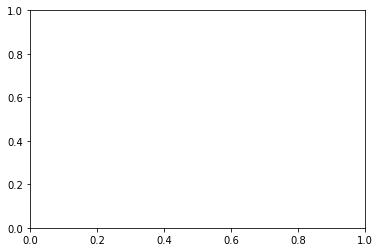

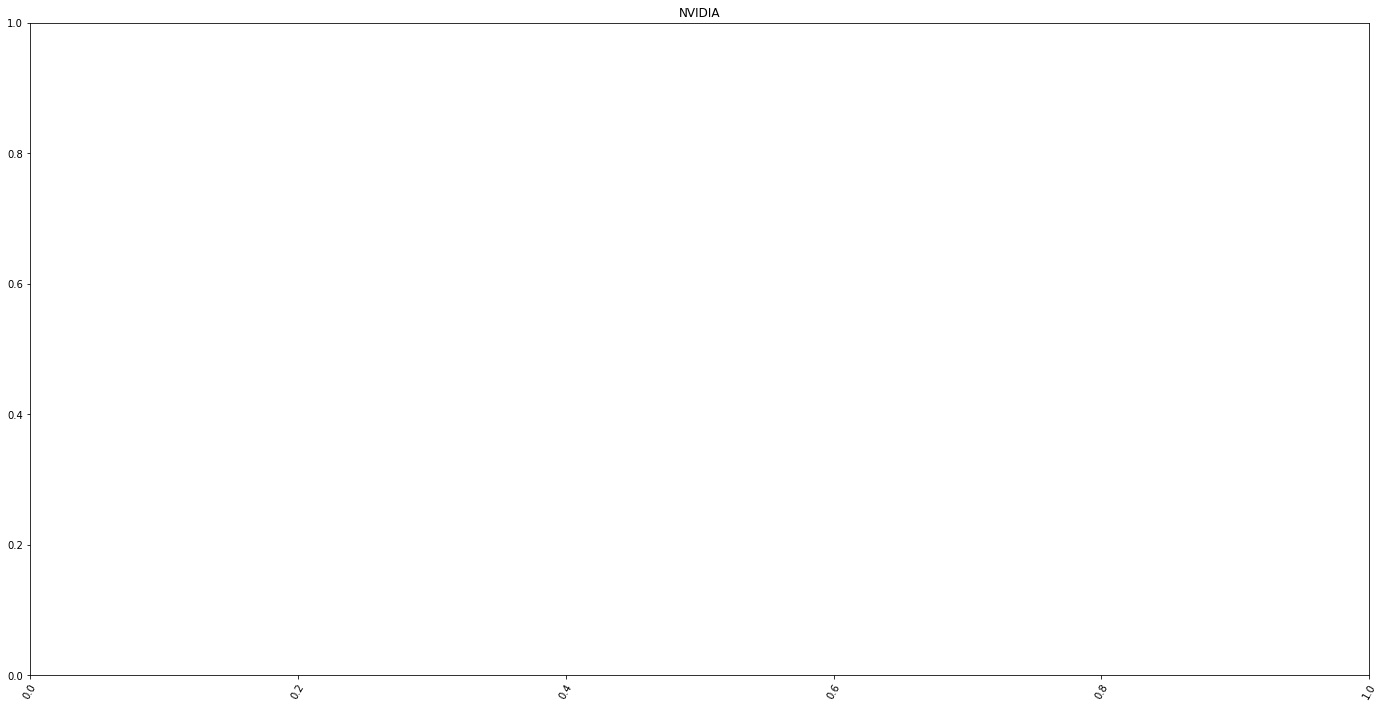

In [ ]:

fig,ax = plt.subplots()
# plotting our target variable
plt.figure(figsize=(24,12))
plt.title("NVIDIA")
plt.xticks(rotation=60)
ax.set_xticks(NVDA3.combine)
plt.plot(NVDA3.Close)

In [ ]:
import matplotlib.pyplot.xticks
locs, labels = xticks()

ModuleNotFoundError: ignored

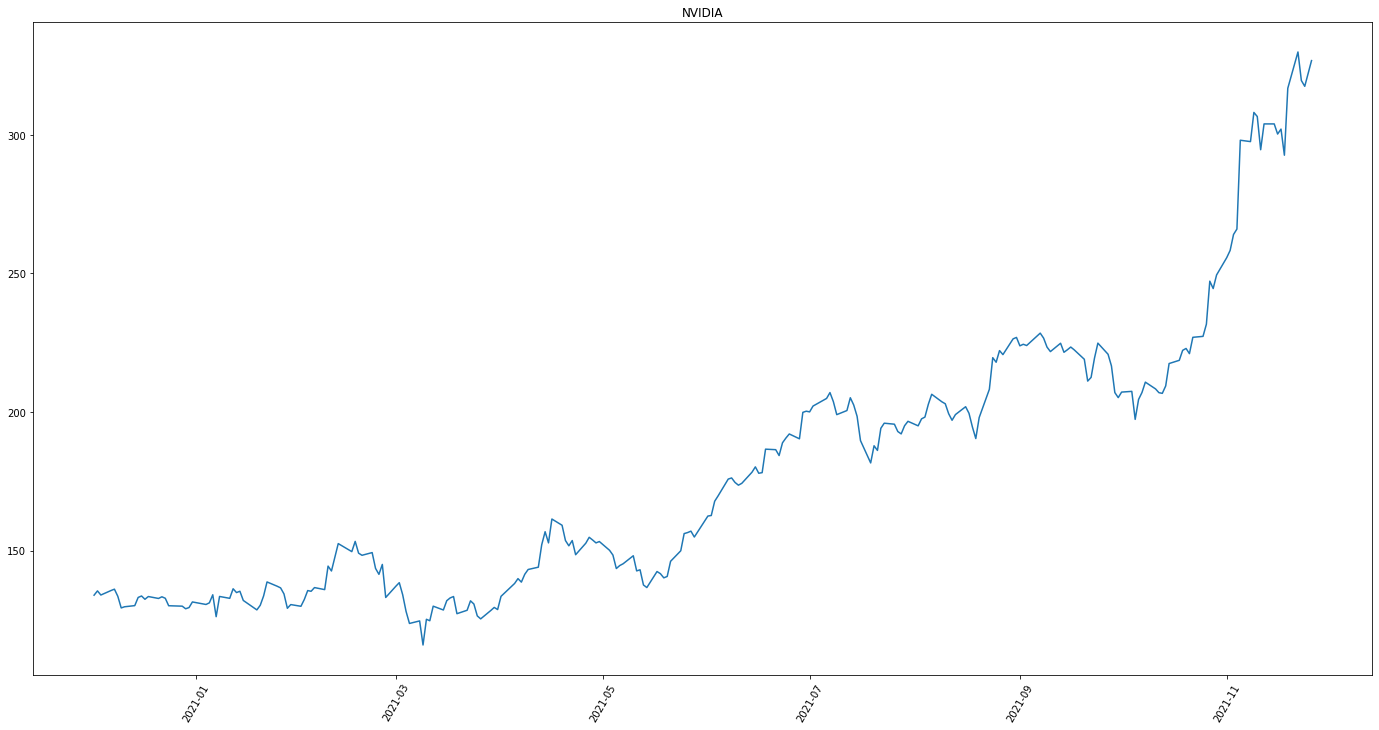

In [ ]:

# plotting our target variable
plt.figure(figsize=(24,12))
plt.title("NVIDIA")
plt.xticks(rotation=60)
plt.plot(NVDA3.Date, NVDA3.Close)
# plt.xticks(NVDA3.Close,['Bill', 'Fred', 'Mary', 'Sue'])

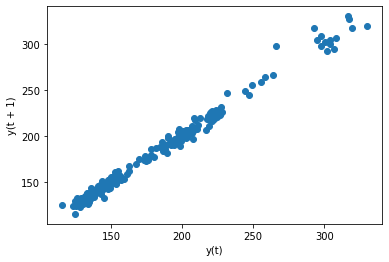

In [ ]:
from pandas.plotting import lag_plot
lag_plot(NVDA3.Close)

<Figure size 432x288 with 0 Axes>

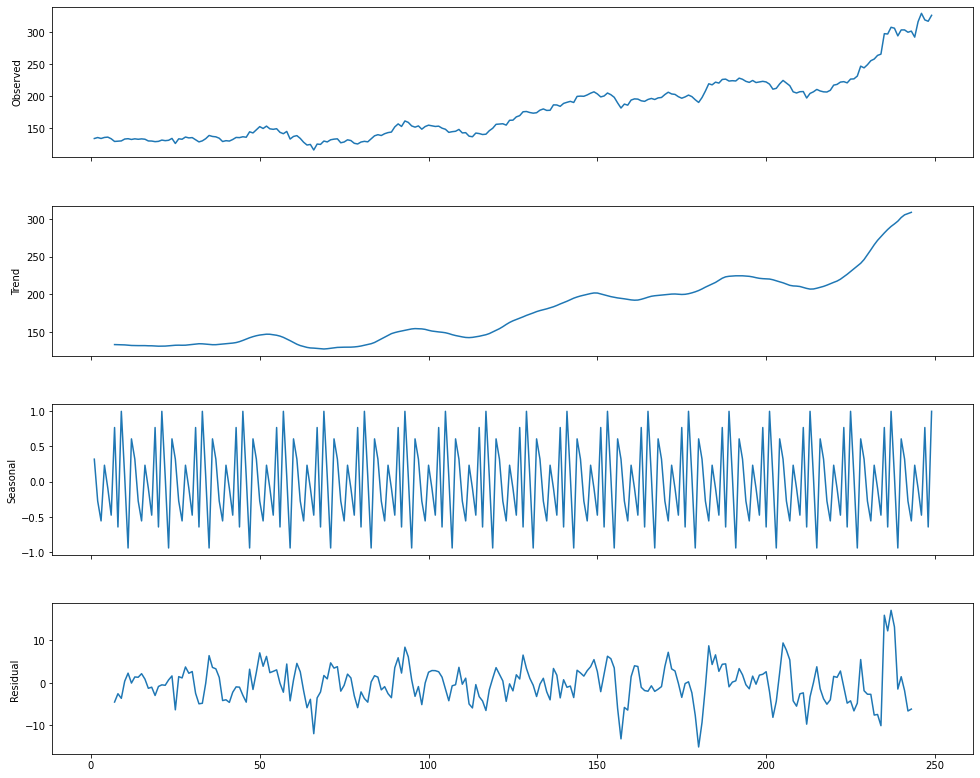

In [ ]:
# Decompisition into trend, seasonality and randomness. # There is additive seasonlity present
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(NVDA3.Close, model='additive', freq=12)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 12)

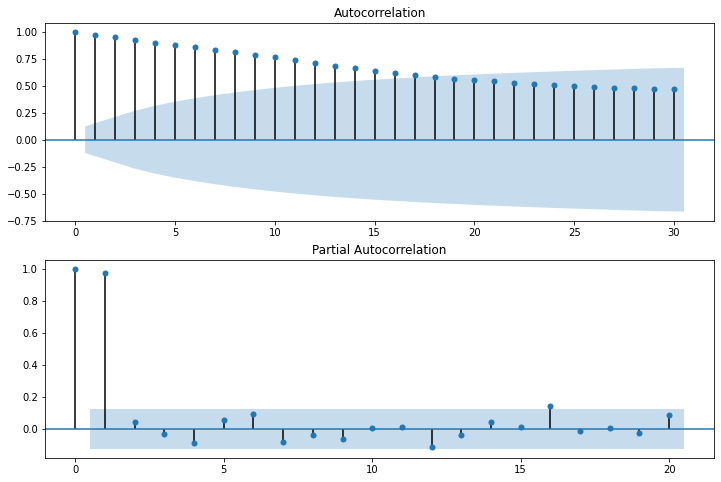

In [ ]:
# Auto Correlation and Partial Auto Correlation plot
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(NVDA3.Close, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(NVDA3.Close, lags=20, ax=ax2)

In [ ]:
# Performing differencing once to convert it into stationary format
first_diff = NVDA3.Close - NVDA3.Close.shift(1)
first_diff = first_diff.dropna(inplace = False)

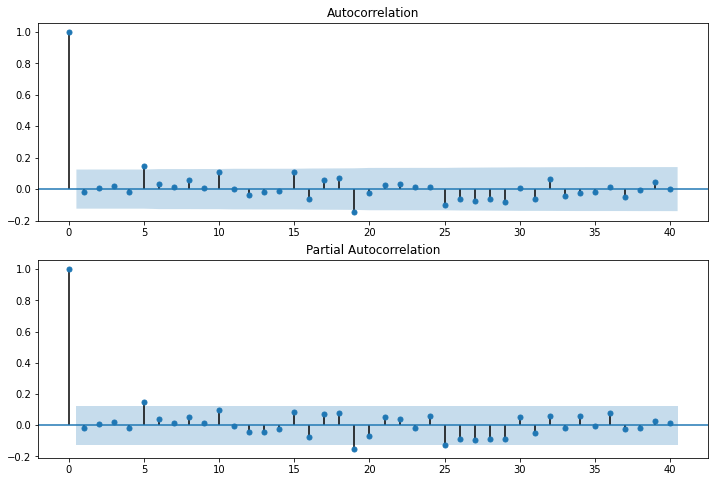

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

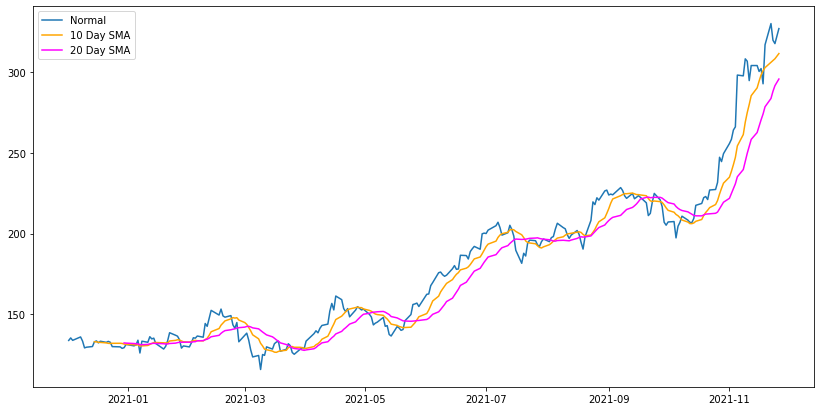

In [ ]:
# Simple Moving Average plot with window size of 10, 20.
plt.figure(figsize=(14,7))
rolling_mean = NVDA3.Close.rolling(window=10).mean()
rolling_mean2 = NVDA3.Close.rolling(window=20).mean()
plt.plot(NVDA3.Date, NVDA3.Close, label='Normal')
plt.plot(NVDA3.Date, rolling_mean, label='10 Day SMA', color='orange')
plt.plot(NVDA3.Date, rolling_mean2, label='20 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


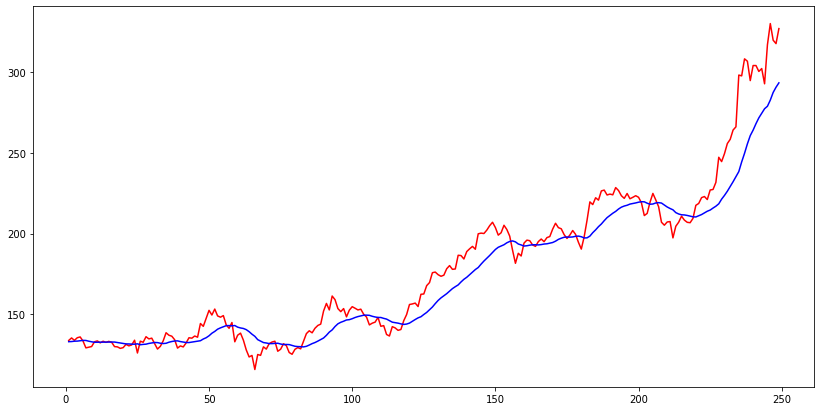

In [ ]:
# plot with exp smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
model=SimpleExpSmoothing(NVDA3.Close).fit(smoothing_level=0.1,optimized =True)
plt.figure(figsize=(14,7))
NVDA3.Close.plot( color='red')
model.fittedvalues.plot(color='blue')

In [ ]:
# error metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
def error_metrics(target, target_pred):

    # Mean squared error
    mse = mean_squared_error(target, target_pred)

    # Root Mean squared error
    rmse = np.sqrt(mean_squared_error(target, target_pred))

    # Mean absolute error
    mae = mean_absolute_error(target, target_pred)


    # printing values

    print('mean squared error: ', mse)

    print('root mean squared error: ', rmse)

    print('mean absolute error: ', mae)

    print('mean absolute percentage error: ', mean_absolute_percentage_error(target, target_pred))


In [ ]:
# the simple moving average over a period of 10 months
NVDA3['SMA_5'] = NVDA3.Close.rolling(5, min_periods=1).mean()

# the simple moving average over a period of 10 months
NVDA3['SMA_10'] = NVDA3.Close.rolling(10, min_periods=1).mean()

# the simple moving average over a period of 20 months
NVDA3['SMA_20'] = NVDA3.Close.rolling(20, min_periods=1).mean()


In [ ]:
error_metrics(NVDA3.Close, NVDA3.SMA_5)

mean squared error:  31.384776090541507
root mean squared error:  5.602211714184096
mean absolute error:  3.9658038240200386
mean absolute percentage error:  0.02169311612925374


In [ ]:
error_metrics(NVDA3.Close, NVDA3.SMA_10)

mean squared error:  86.28657527352713
root mean squared error:  9.289056748320958
mean absolute error:  6.568621120719159
mean absolute percentage error:  0.03480999796451953


In [ ]:
error_metrics(NVDA3.Close, NVDA3.SMA_20)

mean squared error:  241.33707091605444
root mean squared error:  15.53502722611243
mean absolute error:  10.794367965744813
mean absolute percentage error:  0.0548883127938329


In [ ]:
NVDA4 = NVDA3[['Close',"Date"]]

In [ ]:
NVDA4.dtypes

Close           float64
Date     datetime64[ns]
dtype: object

In [ ]:
NVDA4.set_index("Date",inplace = True)

In [ ]:
# Exponential Moving avg
model=SimpleExpSmoothing(NVDA4.Close).fit(smoothing_level=0.1,optimized =True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
NVDA4

,Close
Date,
2020-12-02,133.899994
2020-12-03,135.445007
2020-12-04,133.960007
2020-12-07,135.582504
2020-12-08,136.067505
...,...
2021-11-19,316.750000
2021-11-22,329.850006
2021-11-23,319.559998


In [ ]:
pred_exp = model.predict(start="2020-12-02", end="2021-11-26")

In [ ]:
error_metrics(NVDA4.Close, pred_exp)

mean squared error:  200.87513432845304
root mean squared error:  14.173042521930604
mean absolute error:  9.708743548732345
mean absolute percentage error:  0.049029178349088


In [ ]:
forcast_exp= model.forecast(steps = 12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


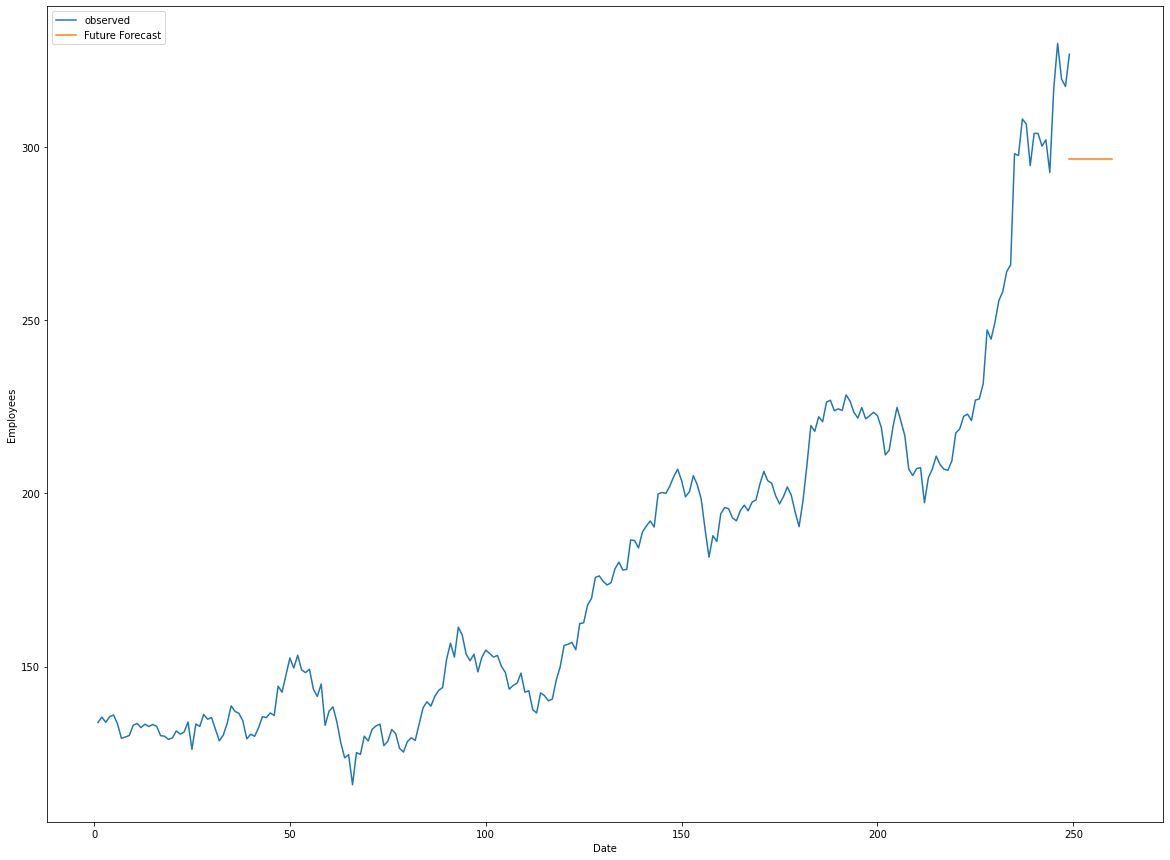

In [ ]:
# Graphical view of the forecasted Exp MA model
ax = NVDA4.Close.plot(label='observed', figsize=(20, 15))
forcast_exp.plot( ax= ax, label='Future Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Employees')

plt.legend()
plt.show()

In [ ]:
# building arima model with p = 11 (since after every 12th lag there is spike), and d = 1. As per the above ACF-PACF plots
arima_model = sm.tsa.ARIMA(NVDA4.Close, (11,1,0)).fit()
print(arima_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  248
Model:                ARIMA(11, 1, 0)   Log Likelihood                -744.419
Method:                       css-mle   S.D. of innovations              4.865
Date:                Sat, 04 Dec 2021   AIC                           1514.839
Time:                        15:32:06   BIC                           1560.513
Sample:                             1   HQIC                          1533.226
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8144      0.450      1.810      0.072      -0.067       1.696
ar.L1.D.Close     -0.0163      0.064     -0.254      0.800      -0.142       0.110
ar.L2.D.Close     -0.0008      0.064

NormaltestResult(statistic=84.150455383901, pvalue=5.3328674409618675e-19)


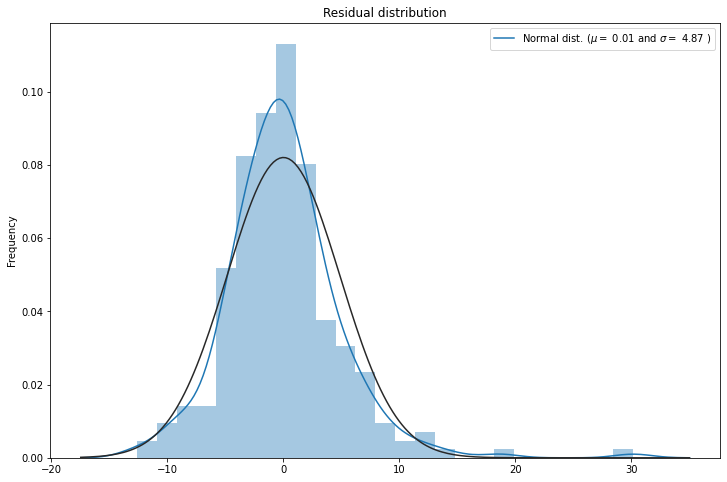

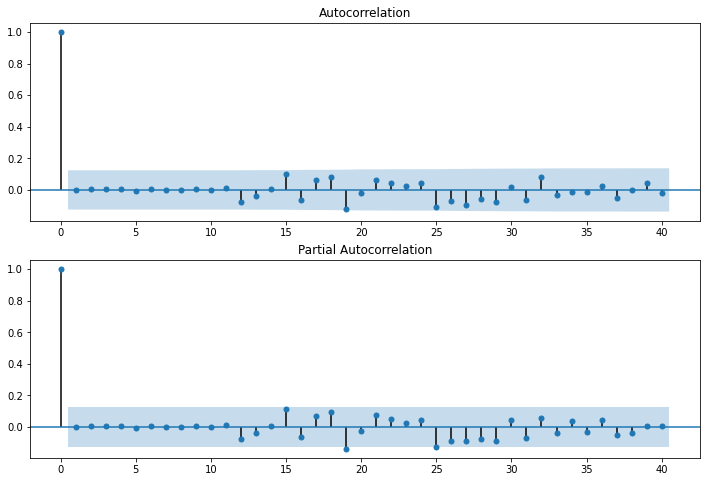

In [ ]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_model.resid
print(normaltest(resid))

# Residual plots distribution vs normal distribution
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0)

(mu, sigma) = stats.norm.fit(resid)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_model.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_model.resid, lags=40, ax=ax2)

In [ ]:
# building seasonal arima model to take into account both trend and seasonlity
sarima_model = sm.tsa.statespace.SARIMAX(NVDA4.Close,order=(11,1,0)\
                                  , enforce_stationarity=False\
                                  , enforce_invertibility=False\
                                  , trend='t').fit()
sarima_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Close   No. Observations:                  249
Model:              SARIMAX(11, 1, 0)   Log Likelihood                -714.252
Date:                Sat, 04 Dec 2021   AIC                           1454.505
Time:                        15:33:25   BIC                           1499.589
Sample:                             0   HQIC                          1472.677
                                - 249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0061      0.003      2.267      0.023       0.001       0.011
ar.L1         -0.0284      0.071     -0.402      0.687      -0.167       0.110
ar.L2         -0.0131      0.059     -0.224      0.823      -0.128       0.102
ar.L3         -0.0143      0.073     -0.195      0.846      -0.158       0.129
ar.L4         -0.0284      0.051     -0.559      0.576      -0.128       0.071
ar.L5          0.1467      0.094      1.556      0.120      -0.038       0.332
ar.L6          0.0313      0.094      0.334      0.738      -0.152       0.215
ar.L7         -0.0152      0.064     -0.239      0.811      -0.140       0.109
ar.L8          0.0395      0.078      0.509      0.611      -0.113       0.192
ar.L9          0.0143      0.074      0.194      0.846      -0.130       0.159
ar.L10         0.0986      0.057      1.737      0.082      -0.013       0.210
ar.L11        -0.0257      0.071     -0.363      0.717      -0.165       0.113
sigma2        24.2779      1.776     13.667      0.000      20.796      27.759
===================================================================================
Ljung-Box (Q):                       31.08   Jarque-Bera (JB):               370.39
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

NormaltestResult(statistic=457.9789557806152, pvalue=3.5574052227570173e-100)


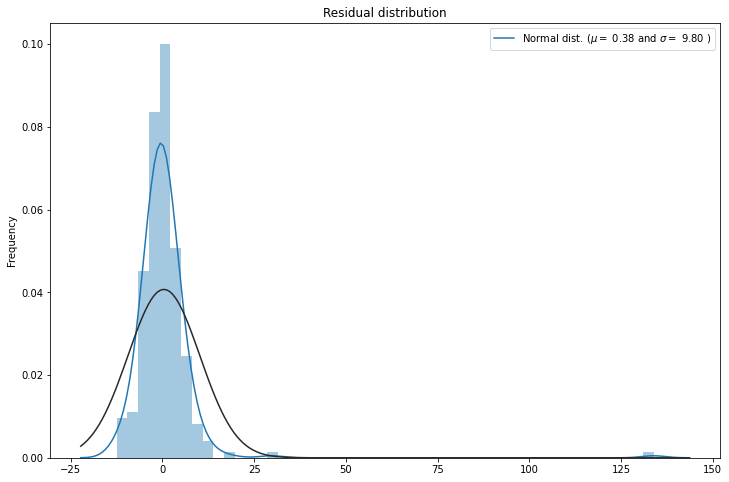

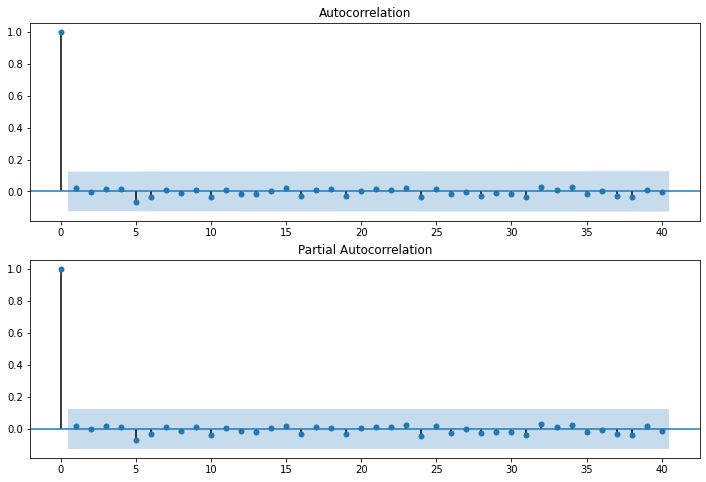

In [ ]:
from scipy import stats
from scipy.stats import normaltest

resid = sarima_model.resid
print(normaltest(resid))


fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

# Residual plots distribution vs normal distribution
sns.distplot(resid ,fit = stats.norm, ax = ax0)

(mu, sigma) = stats.norm.fit(resid)


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarima_model.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarima_model.resid, lags=40, ax=ax2)

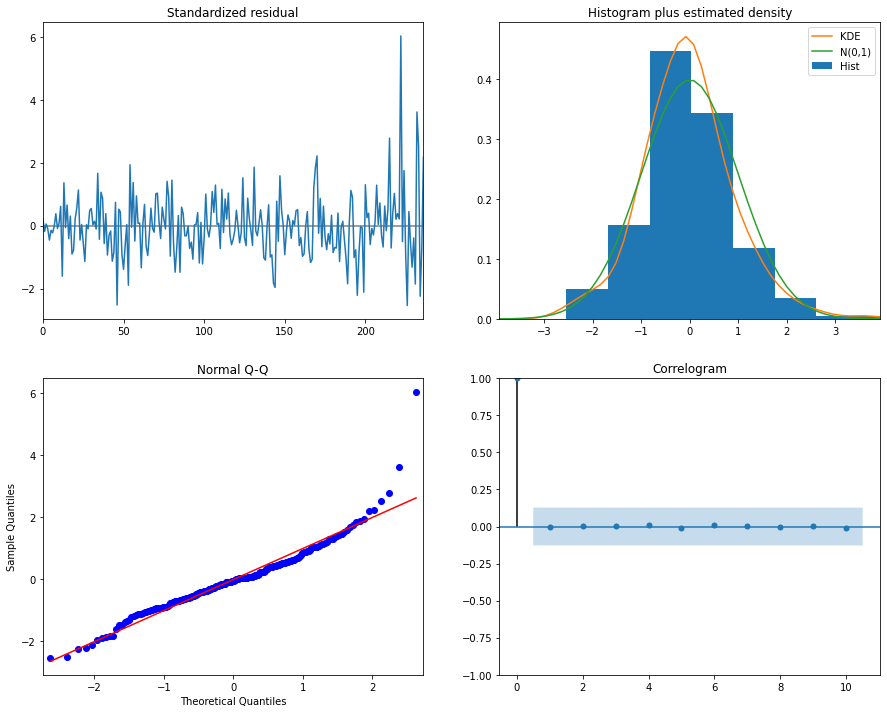

In [ ]:
# Diagnostics plot
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Checking the model performance
start_date="2020-12-02"
end_date="2021-11-26"
NVDA4['forecast']  = sarima_model.predict(n_periods=len(NVDA4))
NVDA4[start_date:end_date][['Close', 'forecast']].plot(figsize=(12, 8))

TypeError: ignored

In [ ]:
error_metrics(NVDA4['Close'], NVDA4['forecast'])

mean squared error:  96.1739326935846
root mean squared error:  9.806830920005943
mean absolute error:  4.043066084019318
mean absolute percentage error:  0.023760302057981148


In [ ]:
# Get forecast 12 months ahead in future
pred_uc = sarima_model.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
pred_ci

,lower Close,upper Close
249,322.437845,341.752350
250,322.795982,349.725368
251,319.006174,351.693337
252,318.048776,355.493289
253,318.691488,360.124182
254,321.127391,367.402217
255,321.303153,372.147876
256,319.522592,374.413994
257,319.408922,378.320407
258,320.508935,383.206697


In [ ]:
# Graphical view of the forecasted SARIMA model
ax = NVDA4.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Future Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Employees')

plt.legend()
plt.show()

ValueError: ignored

# Getting sentiments from the data

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [ ]:
NVDA3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3,month,year,combine,SMA_5,SMA_10,SMA_20
1,2020-12-02,134.922501,135.287506,132.282501,133.899994,133.743622,29694800.0,NVIDIA Corp.,NVDA,2020-12-01,[' NVDA NVIDIA Corp NVDA Presents at Wells Far...,12,2020,12 2020,133.899994,133.899994,133.899994
2,2020-12-03,133.505005,136.735001,132.342499,135.445007,135.286850,28336000.0,NVIDIA Corp.,NVDA,2020-12-02,['I made my watchlist in under minutes tonight...,12,2020,12 2020,134.672501,134.672501,134.672501
3,2020-12-04,135.875000,136.600006,133.289993,133.960007,133.843109,19952000.0,NVIDIA Corp.,NVDA,2020-12-03,['Semiconductor Industry SIA report says world...,12,2020,12 2020,134.435003,134.435003,134.435003
4,2020-12-07,134.485001,135.600006,133.887497,135.582504,135.464188,20224400.0,NVIDIA Corp.,NVDA,2020-12-04,"[' SE ここはまじでガチホ NVDA くらいの握力でいきます', ' NVDA http...",12,2020,12 2020,134.721878,134.721878,134.721878
5,2020-12-08,136.012497,137.312500,135.000000,136.067505,135.948761,22324400.0,NVIDIA Corp.,NVDA,2020-12-07,[' spy spx compq ndx qqq tsla fsr pltr aapl am...,12,2020,12 2020,134.991003,134.991003,134.991003


In [ ]:
NVDA3['Text4'] = NVDA3['Text3'].to_list()

In [ ]:
NVDA3['Text3'].iloc[0]

"[' NVDA NVIDIA Corp NVDA Presents at Wells Fargo TMT Broker Conference Call Transcript https t co xBzwrKAKCu trading stockmarket finance', ' AMD went short of ATH Closed Dec C today to lock gains but still holding Jan C NVDA sleeping for weeks DT yesterday and today and made then bought couple of ITM calls for swing https t co fO OLpFvJ', ' USA NewYork stockmarkets TRADINGTIPS tradingstrategy Hot NASDAQ stockstowatch Moneyflow TSLA MRNA AAPL AMZN ZM MSFT FB AMD NVDA GOOGL Most Active AAL NKLA INTC CAAS TLRY Top Gainers CRBP KIRK XNET NSTG https t co HLpqDTVjMo', ' NVDA Call Jan limit order set for a day stocks stockmarket options daytrading stocktips OptionsTrading calloptions', ' Soumyazen How about NVDA ', ' NoLeechOptions Between PTON NVDA and ZM today was losing day Not in NFLX AMZN or CMG or would have been positive ', 'New positions CLLS JMIA Added to HD WMT COST NVDA FSLY GTHX', 'Tuesday s Top Flow in S amp P SP Buy Flow and Sell Flow AMZN MSFT AAPL V GOOGL FB NVDA BAC NFLX MA 

In [ ]:
type(NVDA3['Text3'].iloc[0])

str

In [ ]:
len(NVDA3['Text3'].iloc[0].split(","))

523

In [ ]:
NVDA3['Text3_converted'] = NVDA3['Text3'].apply(lambda x : x.split(","))

In [ ]:
NVDA3['Text3_converted'].iloc[0][0]

"[' NVDA NVIDIA Corp NVDA Presents at Wells Fargo TMT Broker Conference Call Transcript https t co xBzwrKAKCu trading stockmarket finance'"

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
NVDA3.shape[0]

249

In [ ]:
sia = SIA()
New_Sentiment_Class=[]
for i in range(0,NVDA3.shape[0]):
  results = []

  for line in NVDA3['Text3_converted'].iloc[i]:
      compound_result = []
      try:
          pol_score = sia.polarity_scores(line)
          # print(pol_score['compound'])
          results.append(pol_score)
      except:
          results.append("Not found")
            # compound_result.append(results)
  # results


  results2 = pd.DataFrame(results)
  results2['Sentiment_Class'] = (np.select(condlist=[results2['compound'] >= 0.07,
                                                            results2['compound'] < 0.07],
                                                  choicelist=['Positive', "Negative"], default='Negative'))


  # results2['Sentiment_Class'] = (np.select(condlist=[results2['compound'] >= 0.05,
  #                                                           results2['compound'] <= -0.05],
  #                                                 choicelist=['Positive', "Negative"], default='Neutral'))


  results2['Sentiment_Class'].
  New_Sentiment_Class.append(stats.mode(results2['Sentiment_Class']).mode[0])


# df= df.join(pd.DataFrame(results))

In [ ]:
pd.DataFrame(
results2['Sentiment_Class'].value_counts()).reset_index()

,index,Sentiment_Class
0,Negative,586
1,Positive,497


In [ ]:
New_Sentiment_Class

['Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',

In [ ]:
NVDA3['New_Sentiment_Class'] = New_Sentiment_Class

In [ ]:
NVDA3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3,month,year,combine,SMA_5,SMA_10,SMA_20,Text4,Text3_converted,New_Sentiment_Class
1,2020-12-02,134.922501,135.287506,132.282501,133.899994,133.743622,29694800.0,NVIDIA Corp.,NVDA,2020-12-01,[' NVDA NVIDIA Corp NVDA Presents at Wells Far...,12,2020,12 2020,133.899994,133.899994,133.899994,[' NVDA NVIDIA Corp NVDA Presents at Wells Far...,[[' NVDA NVIDIA Corp NVDA Presents at Wells Fa...,Negative
2,2020-12-03,133.505005,136.735001,132.342499,135.445007,135.286850,28336000.0,NVIDIA Corp.,NVDA,2020-12-02,['I made my watchlist in under minutes tonight...,12,2020,12 2020,134.672501,134.672501,134.672501,['I made my watchlist in under minutes tonight...,[['I made my watchlist in under minutes tonigh...,Negative
3,2020-12-04,135.875000,136.600006,133.289993,133.960007,133.843109,19952000.0,NVIDIA Corp.,NVDA,2020-12-03,['Semiconductor Industry SIA report says world...,12,2020,12 2020,134.435003,134.435003,134.435003,['Semiconductor Industry SIA report says world...,[['Semiconductor Industry SIA report says worl...,Negative
4,2020-12-07,134.485001,135.600006,133.887497,135.582504,135.464188,20224400.0,NVIDIA Corp.,NVDA,2020-12-04,"[' SE ここはまじでガチホ NVDA くらいの握力でいきます', ' NVDA http...",12,2020,12 2020,134.721878,134.721878,134.721878,"[' SE ここはまじでガチホ NVDA くらいの握力でいきます', ' NVDA http...","[[' SE ここはまじでガチホ NVDA くらいの握力でいきます', ' NVDA ht...",Negative
5,2020-12-08,136.012497,137.312500,135.000000,136.067505,135.948761,22324400.0,NVIDIA Corp.,NVDA,2020-12-07,[' spy spx compq ndx qqq tsla fsr pltr aapl am...,12,2020,12 2020,134.991003,134.991003,134.991003,[' spy spx compq ndx qqq tsla fsr pltr aapl am...,[[' spy spx compq ndx qqq tsla fsr pltr aapl a...,Negative


In [ ]:
NVDA3['New_Sentiment_Class'].value_counts()

Negative    243
Positive      6
Name: New_Sentiment_Class, dtype: int64

In [ ]:
NVDA3.to_csv("NVDA3.csv",sep=',', index=False)

In [ ]:
from scipy import stats
stats.mode([1,2,3,3,4,4])

'Neutral'

In [ ]:
results

[{'compound': 0.25, 'neg': 0.0, 'neu': 0.905, 'pos': 0.095},
 {'compound': 0.1779, 'neg': 0.0, 'neu': 0.955, 'pos': 0.045},
 {'compound': 0.5849, 'neg': 0.0, 'neu': 0.873, 'pos': 0.127},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.25, 'neg': 0.103, 'neu': 0.754, 'pos': 0.143},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.2023, 'neg': 0.0, 'neu': 0.959, 'pos': 0.041},
 {'compound': 0.2023, 'neg': 0.0, 'neu': 0.959, 'pos': 0.041},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.7003, 'neg': 0.0, 'neu': 0.784, 'pos': 0.216},
 {'compound': 0.4767, 'neg': 0.086, 'neu': 0.7, 'pos': 0.214},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.5859, 'neg': 0.0, 'neu': 0.853, 'pos': 0.147},
 {'compound': 0.3898, 'neg': 0.0, 'neu': 0.888, 'pos': 0.112},
 {'compound': 0.296, 'neg': 0.0, 'ne

In [ ]:
type(results)

list

In [ ]:
dff = pd.DataFrame()
result2 = dff.join(pd.DataFrame(results))

In [ ]:
results2 = pd.DataFrame(results)

In [ ]:
results2['Sentiment_Class'] = (np.select(condlist=[results2['compound'] >= 0.05,
                                                          results2['compound'] <= -0.05],
                                                choicelist=['Positive', "Negative"], default='Neutral'))

In [ ]:
results2['Sentiment_Class2'] = (np.select(condlist=[results2['compound'] > 0.0,
                                                          results2['compound'] < -0.0],
                                                choicelist=['Positive', "Negative"], default='Neutral'))

In [ ]:
results2['Sentiment_Class']

0      Positive
1      Positive
2      Positive
3       Neutral
4       Neutral
         ...   
518     Neutral
519     Neutral
520    Positive
521    Negative
522    Negative
Name: Sentiment_Class, Length: 523, dtype: object

In [ ]:
results2['Sentiment_Class'].value_counts()

Neutral     232
Positive    227
Negative     64
Name: Sentiment_Class, dtype: int64

In [ ]:
results2['Sentiment_Class2'].value_counts()

Neutral     232
Positive    227
Negative     64
Name: Sentiment_Class2, dtype: int64

In [ ]:
 def another_lib_senti_analysis(df):
    import nltk
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    sia = SIA()
    results = []

    for line in df['News_headLine']:
        try:
            pol_score = sia.polarity_scores(line)
            results.append(pol_score)
        except:
            results.append("Not found")

    df= df.join(pd.DataFrame(results))

    #sia = SIA()
    results2 = []

    for lines in df['News_description']:
        try:
            pol_score = sia.polarity_scores(lines)
            results2.append(pol_score)
        except:
            results2.append("Not found")


    df= df.join(pd.DataFrame(results2).rename(columns={"neg": "neg_des", "neu": "neu_des", "pos": "pos_des", "compound": "compound_des"}))

    return df

# LSTM

In [ ]:
import pandas as pd
data = pd.read_csv("Amazon_sentiments_BERT.csv")

In [ ]:
data.shape

(249, 16)

In [ ]:
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3,Text4,Text3_converted,cleaned_tweet,sentiments
0,1,2020-12-02,3188.500000,3248.949951,3157.179932,3220.080078,3220.080078,4537000.0,Amazon.com Inc.,AMZN,2020-12-01,"['@maybebullish $AMZN &amp; $NET', ""The Tuesda...","['@maybebullish $AMZN &amp; $NET', ""The Tuesda...","[""['@maybebullish $AMZN &amp; $NET'"", ' ""The T...",one benefits my wife having crohns disease i n...,POSITIVE
1,2,2020-12-03,3221.649902,3232.000000,3173.260010,3203.530029,3203.530029,3129300.0,Amazon.com Inc.,AMZN,2020-12-02,['Thanks to everyone who came &amp; checked us...,['Thanks to everyone who came &amp; checked us...,"[""['Thanks to everyone who came &amp; checked ...",one benefits my wife having crohns disease i n...,POSITIVE
2,3,2020-12-04,3205.459961,3228.639893,3181.310059,3186.729980,3186.729980,2892000.0,Amazon.com Inc.,AMZN,2020-12-03,"['$AMZN https://t.co/i6KAqz0pS3', 'I have a fe...","['$AMZN https://t.co/i6KAqz0pS3', 'I have a fe...","[""['$AMZN https://t.co/i6KAqz0pS3'"", "" 'I have...",one benefits my wife having crohns disease i n...,NEGATIVE
3,4,2020-12-07,3198.209961,3198.209961,3158.760010,3162.580078,3162.580078,2913600.0,Amazon.com Inc.,AMZN,2020-12-04,['Will contact $AMZN for a copy 🤔 ? https://t....,['Will contact $AMZN for a copy 🤔 ? https://t....,"[""['Will contact $AMZN for a copy 🤔 ? https://...",one benefits my wife having crohns disease i n...,NEGATIVE
4,5,2020-12-08,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300.0,Amazon.com Inc.,AMZN,2020-12-07,['@StonkTrump Highly recommend looking at some...,['@StonkTrump Highly recommend looking at some...,"[""['@StonkTrump Highly recommend looking at so...",one benefits my wife having crohns disease i n...,NEGATIVE


In [ ]:
data1 = data.sort_values(by = "Date",ascending=False)
data1

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3,Text4,Text3_converted,cleaned_tweet,sentiments
248,249,2021-11-26,3562.669922,3613.639893,3536.850098,3580.409912,3580.409912,2328000.0,Amazon.com Inc.,AMZN,2021-11-24,"[""@blklab4 One of the benefits of my wife havi...","[""@blklab4 One of the benefits of my wife havi...","['[""@blklab4 One of the benefits of my wife ha...",one benefits my wife having crohns disease i n...,NEGATIVE
247,248,2021-11-24,3585.040039,3621.050049,3527.709961,3580.040039,3580.040039,3690200.0,Amazon.com Inc.,AMZN,2021-11-23,['$RIVN \n\nWhat are your thoughts on this ? I...,['$RIVN \n\nWhat are your thoughts on this ? I...,"[""['$RIVN \\n\\nWhat are your thoughts on this...",one benefits my wife having crohns disease i n...,NEGATIVE
246,247,2021-11-23,3676.379883,3713.459961,3567.500000,3572.570068,3572.570068,4842200.0,Amazon.com Inc.,AMZN,2021-11-22,"['@BullishJason $amzn', 'what if we See $TSLA ...","['@BullishJason $amzn', 'what if we See $TSLA ...","[""['@BullishJason $amzn'"", "" 'what if we See $...",one benefits my wife having crohns disease i n...,NEGATIVE
245,246,2021-11-22,3712.689941,3762.149902,3675.719971,3676.570068,3676.570068,4936700.0,Amazon.com Inc.,AMZN,2021-11-19,['@GoodNewsStock @valuestockwatch I do t think...,['@GoodNewsStock @valuestockwatch I do t think...,"[""['@GoodNewsStock @valuestockwatch I do t thi...",one benefits my wife having crohns disease i n...,NEGATIVE
244,245,2021-11-19,3566.350098,3704.199951,3561.000000,3696.060059,3696.060059,5703500.0,Amazon.com Inc.,AMZN,2021-11-18,['Here are the trades we took today :\n\n$AMZN...,['Here are the trades we took today :\n\n$AMZN...,"[""['Here are the trades we took today :\\n\\n$...",one benefits my wife having crohns disease i n...,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,2020-12-08,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300.0,Amazon.com Inc.,AMZN,2020-12-07,['@StonkTrump Highly recommend looking at some...,['@StonkTrump Highly recommend looking at some...,"[""['@StonkTrump Highly recommend looking at so...",one benefits my wife having crohns disease i n...,NEGATIVE
3,4,2020-12-07,3198.209961,3198.209961,3158.760010,3162.580078,3162.580078,2913600.0,Amazon.com Inc.,AMZN,2020-12-04,['Will contact $AMZN for a copy 🤔 ? https://t....,['Will contact $AMZN for a copy 🤔 ? https://t....,"[""['Will contact $AMZN for a copy 🤔 ? https://...",one benefits my wife having crohns disease i n...,NEGATIVE
2,3,2020-12-04,3205.459961,3228.639893,3181.310059,3186.729980,3186.729980,2892000.0,Amazon.com Inc.,AMZN,2020-12-03,"['$AMZN https://t.co/i6KAqz0pS3', 'I have a fe...","['$AMZN https://t.co/i6KAqz0pS3', 'I have a fe...","[""['$AMZN https://t.co/i6KAqz0pS3'"", "" 'I have...",one benefits my wife having crohns disease i n...,NEGATIVE
1,2,2020-12-03,3221.649902,3232.000000,3173.260010,3203.530029,3203.530029,3129300.0,Amazon.com Inc.,AMZN,2020-12-02,['Thanks to everyone who came &amp; checked us...,['Thanks to everyone who came &amp; checked us...,"[""['Thanks to everyone who came &amp; checked ...",one benefits my wife having crohns disease i n...,POSITIVE


In [ ]:
data1_1 = data1.set_index("Date")
data1_2 = data1_1.shift(periods=1)

In [ ]:
data1_2.reset_index(inplace=True)

In [ ]:
data1_3 = data1_2.sort_values(by = 'Date')
data1_3

,Date,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3,Text4,Text3_converted,cleaned_tweet,sentiments
248,2020-12-02,2.0,3221.649902,3232.000000,3173.260010,3203.530029,3203.530029,3129300.0,Amazon.com Inc.,AMZN,2020-12-02,['Thanks to everyone who came &amp; checked us...,['Thanks to everyone who came &amp; checked us...,"[""['Thanks to everyone who came &amp; checked ...",one benefits my wife having crohns disease i n...,POSITIVE
247,2020-12-03,3.0,3205.459961,3228.639893,3181.310059,3186.729980,3186.729980,2892000.0,Amazon.com Inc.,AMZN,2020-12-03,"['$AMZN https://t.co/i6KAqz0pS3', 'I have a fe...","['$AMZN https://t.co/i6KAqz0pS3', 'I have a fe...","[""['$AMZN https://t.co/i6KAqz0pS3'"", "" 'I have...",one benefits my wife having crohns disease i n...,NEGATIVE
246,2020-12-04,4.0,3198.209961,3198.209961,3158.760010,3162.580078,3162.580078,2913600.0,Amazon.com Inc.,AMZN,2020-12-04,['Will contact $AMZN for a copy 🤔 ? https://t....,['Will contact $AMZN for a copy 🤔 ? https://t....,"[""['Will contact $AMZN for a copy 🤔 ? https://...",one benefits my wife having crohns disease i n...,NEGATIVE
245,2020-12-07,5.0,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300.0,Amazon.com Inc.,AMZN,2020-12-07,['@StonkTrump Highly recommend looking at some...,['@StonkTrump Highly recommend looking at some...,"[""['@StonkTrump Highly recommend looking at so...",one benefits my wife having crohns disease i n...,NEGATIVE
244,2020-12-08,6.0,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300.0,Amazon.com Inc.,AMZN,2020-12-08,"[""Help ea other out a bit &amp; ReTWEET this p...","[""Help ea other out a bit &amp; ReTWEET this p...","['[""Help ea other out a bit &amp; ReTWEET this...",one benefits my wife having crohns disease i n...,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-11-19,246.0,3712.689941,3762.149902,3675.719971,3676.570068,3676.570068,4936700.0,Amazon.com Inc.,AMZN,2021-11-19,['@GoodNewsStock @valuestockwatch I do t think...,['@GoodNewsStock @valuestockwatch I do t think...,"[""['@GoodNewsStock @valuestockwatch I do t thi...",one benefits my wife having crohns disease i n...,NEGATIVE
3,2021-11-22,247.0,3676.379883,3713.459961,3567.500000,3572.570068,3572.570068,4842200.0,Amazon.com Inc.,AMZN,2021-11-22,"['@BullishJason $amzn', 'what if we See $TSLA ...","['@BullishJason $amzn', 'what if we See $TSLA ...","[""['@BullishJason $amzn'"", "" 'what if we See $...",one benefits my wife having crohns disease i n...,NEGATIVE
2,2021-11-23,248.0,3585.040039,3621.050049,3527.709961,3580.040039,3580.040039,3690200.0,Amazon.com Inc.,AMZN,2021-11-23,['$RIVN \n\nWhat are your thoughts on this ? I...,['$RIVN \n\nWhat are your thoughts on this ? I...,"[""['$RIVN \\n\\nWhat are your thoughts on this...",one benefits my wife having crohns disease i n...,NEGATIVE
1,2021-11-24,249.0,3562.669922,3613.639893,3536.850098,3580.409912,3580.409912,2328000.0,Amazon.com Inc.,AMZN,2021-11-24,"[""@blklab4 One of the benefits of my wife havi...","[""@blklab4 One of the benefits of my wife havi...","['[""@blklab4 One of the benefits of my wife ha...",one benefits my wife having crohns disease i n...,NEGATIVE


In [ ]:
data1_3.dropna(inplace = True)

In [ ]:
data1_3

,Date,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Company,Stock_Symbol,Datetime2,Text3,Text4,Text3_converted,cleaned_tweet,sentiments
248,2020-12-02,2.0,3221.649902,3232.000000,3173.260010,3203.530029,3203.530029,3129300.0,Amazon.com Inc.,AMZN,2020-12-02,['Thanks to everyone who came &amp; checked us...,['Thanks to everyone who came &amp; checked us...,"[""['Thanks to everyone who came &amp; checked ...",one benefits my wife having crohns disease i n...,POSITIVE
247,2020-12-03,3.0,3205.459961,3228.639893,3181.310059,3186.729980,3186.729980,2892000.0,Amazon.com Inc.,AMZN,2020-12-03,"['$AMZN https://t.co/i6KAqz0pS3', 'I have a fe...","['$AMZN https://t.co/i6KAqz0pS3', 'I have a fe...","[""['$AMZN https://t.co/i6KAqz0pS3'"", "" 'I have...",one benefits my wife having crohns disease i n...,NEGATIVE
246,2020-12-04,4.0,3198.209961,3198.209961,3158.760010,3162.580078,3162.580078,2913600.0,Amazon.com Inc.,AMZN,2020-12-04,['Will contact $AMZN for a copy 🤔 ? https://t....,['Will contact $AMZN for a copy 🤔 ? https://t....,"[""['Will contact $AMZN for a copy 🤔 ? https://...",one benefits my wife having crohns disease i n...,NEGATIVE
245,2020-12-07,5.0,3156.479980,3180.760010,3141.689941,3158.000000,3158.000000,2751300.0,Amazon.com Inc.,AMZN,2020-12-07,['@StonkTrump Highly recommend looking at some...,['@StonkTrump Highly recommend looking at some...,"[""['@StonkTrump Highly recommend looking at so...",one benefits my wife having crohns disease i n...,NEGATIVE
244,2020-12-08,6.0,3158.899902,3184.129883,3120.020020,3177.290039,3177.290039,3286300.0,Amazon.com Inc.,AMZN,2020-12-08,"[""Help ea other out a bit &amp; ReTWEET this p...","[""Help ea other out a bit &amp; ReTWEET this p...","['[""Help ea other out a bit &amp; ReTWEET this...",one benefits my wife having crohns disease i n...,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2021-11-18,245.0,3566.350098,3704.199951,3561.000000,3696.060059,3696.060059,5703500.0,Amazon.com Inc.,AMZN,2021-11-18,['Here are the trades we took today :\n\n$AMZN...,['Here are the trades we took today :\n\n$AMZN...,"[""['Here are the trades we took today :\\n\\n$...",one benefits my wife having crohns disease i n...,NEGATIVE
4,2021-11-19,246.0,3712.689941,3762.149902,3675.719971,3676.570068,3676.570068,4936700.0,Amazon.com Inc.,AMZN,2021-11-19,['@GoodNewsStock @valuestockwatch I do t think...,['@GoodNewsStock @valuestockwatch I do t think...,"[""['@GoodNewsStock @valuestockwatch I do t thi...",one benefits my wife having crohns disease i n...,NEGATIVE
3,2021-11-22,247.0,3676.379883,3713.459961,3567.500000,3572.570068,3572.570068,4842200.0,Amazon.com Inc.,AMZN,2021-11-22,"['@BullishJason $amzn', 'what if we See $TSLA ...","['@BullishJason $amzn', 'what if we See $TSLA ...","[""['@BullishJason $amzn'"", "" 'what if we See $...",one benefits my wife having crohns disease i n...,NEGATIVE
2,2021-11-23,248.0,3585.040039,3621.050049,3527.709961,3580.040039,3580.040039,3690200.0,Amazon.com Inc.,AMZN,2021-11-23,['$RIVN \n\nWhat are your thoughts on this ? I...,['$RIVN \n\nWhat are your thoughts on this ? I...,"[""['$RIVN \\n\\nWhat are your thoughts on this...",one benefits my wife having crohns disease i n...,NEGATIVE


In [ ]:
data1=data1_3.reset_index()['Close']

In [ ]:
dataorignal = data1

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(data1)*0.85)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
dataorignal.head()

0    3203.530029
1    3186.729980
2    3162.580078
3    3158.000000
4    3177.290039
Name: Close, dtype: float64

In [ ]:
X_train.shape

(199, 10)

In [ ]:
X_train

array([[0.32276203, 0.30120858, 0.27022572, ..., 0.21100503, 0.26302829,
        0.27348443],
       [0.30120858, 0.27022572, 0.26434975, ..., 0.26302829, 0.27348443,
        0.37078237],
       [0.27022572, 0.26434975, 0.28909771, ..., 0.27348443, 0.37078237,
        0.36452177],
       ...,
       [0.6389681 , 0.67205516, 0.68802769, ..., 0.59534815, 0.60756176,
        0.58226223],
       [0.67205516, 0.68802769, 0.65503053, ..., 0.60756176, 0.58226223,
        0.46700283],
       [0.68802769, 0.65503053, 0.51802536, ..., 0.58226223, 0.46700283,
        0.44796421]])

In [ ]:
226

226

In [ ]:
data1_3.shape

(248, 16)

In [ ]:
new_column = data1_3['sentiments'][:-21]
new_column.shape

(227,)

In [ ]:
new_column2 = new_column[:-200]
new_column2.shape

(27,)

In [ ]:
new_column3  = new_column[:199]
new_column3.shape

(199,)

In [ ]:
new_column3 = new_column3.apply(lambda x: 1 if x == 'POSITIVE' else 0)

In [ ]:
new_column2 = new_column2.apply(lambda x: 1 if x == 'POSITIVE' else 0)

In [ ]:
new_column2.shape

(27,)

In [ ]:
X_train = np.append(X_train, np.array(new_column3).reshape(-1,1), axis=1)

In [ ]:
X_train.shape

(199, 11)

In [ ]:
X_test = np.append(X_test, np.array(new_column2).reshape(-1,1), axis=1)

In [ ]:
X_test.shape

(27, 11)

In [ ]:
print(X_train.shape), print(y_train.shape)

(199, 11)
(199,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(27, 11)
(27,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.regularizers import l2
from keras.layers import Dropout
from keras.layers import BatchNormalization , Flatten
from tensorflow.keras.optimizers import Adam,SGD


In [ ]:
model=Sequential()
model.add(LSTM(512,return_sequences=True,input_shape=(11,1), kernel_regularizer = l2(0.001)))
Dropout(0.2)
model.add(LSTM(512,return_sequences=True, kernel_regularizer = l2(0.001)))
Dropout(0.2)
model.add(Flatten())
model.add(Dense(1))
optimizer = Adam(learning_rate= 1e-2, amsgrad=True)
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 11, 512)           1052672   
                                                                 
 lstm_24 (LSTM)              (None, 11, 512)           2099200   
                                                                 
 flatten_6 (Flatten)         (None, 5632)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 5633      
                                                                 
Total params: 3,157,505
Trainable params: 3,157,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 4s 302ms/step - loss: 3.1807 - val_loss: 0.7146
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7002 - val_loss: 1.2408
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5745 - val_loss: 21.0941
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 10.9651 - val_loss: 18.7254
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 8.4555 - val_loss: 4.4423
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 100.6395 - val_loss: 51.9791
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 22.9079 - val_loss: 2.8435
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 4.3145 - val_loss: 3.6757
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 3.3458 - val_loss: 3.0711
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 3.1353 - val_loss: 3.4318
Epoch 11/10

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

In [ ]:



### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

ValueError: ignored

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

ValueError: ignored

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

ValueError: ignored

In [ ]:
### Plotting
import matplotlib.pyplot as plt

# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: ignored

In [ ]:
len(test_data)

38

In [ ]:
x_input=test_data[:-27].reshape(1,-1)
x_input.shape

(1, 11)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.30512160988865755,
 0.345174944591796,
 0.39778830745946614,
 0.4496446232430049,
 0.43192746630717593,
 0.37763337747614223,
 0.37895484278352765,
 0.42635939596600725,
 0.44634769415423037,
 0.5863932610594018,
 0.6347857027414063]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=11
i=0
while(i<30):

    if(len(temp_input)>11):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.47133487]
12
1 day input [0.34517494 0.39778831 0.44964462 0.43192747 0.37763338 0.37895484
 0.4263594  0.44634769 0.58639326 0.6347857  0.47133487]
1 day output [[0.4995227]]
2 day input [0.39778831 0.44964462 0.43192747 0.37763338 0.37895484 0.4263594
 0.44634769 0.58639326 0.6347857  0.47133487 0.49952269]
2 day output [[0.5254154]]
3 day input [0.44964462 0.43192747 0.37763338 0.37895484 0.4263594  0.44634769
 0.58639326 0.6347857  0.47133487 0.49952269 0.52541542]
3 day output [[0.54443353]]
4 day input [0.43192747 0.37763338 0.37895484 0.4263594  0.44634769 0.58639326
 0.6347857  0.47133487 0.49952269 0.52541542 0.54443353]
4 day output [[0.5571364]]
5 day input [0.37763338 0.37895484 0.4263594  0.44634769 0.58639326 0.6347857
 0.47133487 0.49952269 0.52541542 0.54443353 0.55713642]
5 day output [[0.5619999]]
6 day input [0.37895484 0.4263594  0.44634769 0.58639326 0.6347857  0.47133487
 0.49952269 0.52541542 0.54443353 0.55713642 0.56199992]
6 day output [[0.55856097]]
7 day 

In [ ]:
day_new=np.arange(1,249)
day_pred=np.arange(249,279)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data1.shape

(248, 1)

In [ ]:
data1

array([[0.32276203],
       [0.30120858],
       [0.27022572],
       [0.26434975],
       [0.28909771],
       [0.19532754],
       [0.19185083],
       [0.21100503],
       [0.26302829],
       [0.27348443],
       [0.37078237],
       [0.36452177],
       [0.32034994],
       [0.32616169],
       [0.32659801],
       [0.29933554],
       [0.28319606],
       [0.42594877],
       [0.47475184],
       [0.4283737 ],
       [0.39127087],
       [0.30108016],
       [0.34198044],
       [0.23917833],
       [0.26968667],
       [0.2960383 ],
       [0.20816978],
       [0.21666299],
       [0.27447201],
       [0.22518157],
       [0.19539175],
       [0.2165731 ],
       [0.39954577],
       [0.4554949 ],
       [0.4365587 ],
       [0.43882953],
       [0.48005023],
       [0.36003148],
       [0.36649755],
       [0.32618738],
       [0.50153946],
       [0.54916233],
       [0.46260244],
       [0.48629829],
       [0.51343234],
       [0.47595773],
       [0.45294187],
       [0.429

In [ ]:
scaler.inverse_transform(data1[:])

array([[3203.5300293 ],
       [3186.72998047],
       [3162.58007813],
       [3158.        ],
       [3177.29003906],
       [3104.19995117],
       [3101.48999023],
       [3116.41992188],
       [3156.9699707 ],
       [3165.12011719],
       [3240.95996094],
       [3236.08007813],
       [3201.64990234],
       [3206.17993164],
       [3206.52001953],
       [3185.27001953],
       [3172.68994141],
       [3283.95996094],
       [3322.        ],
       [3285.85009766],
       [3256.92993164],
       [3186.62988281],
       [3218.51000977],
       [3138.37988281],
       [3162.15991211],
       [3182.69995117],
       [3114.20996094],
       [3120.83007812],
       [3165.88989258],
       [3127.4699707 ],
       [3104.25      ],
       [3120.76000977],
       [3263.37988281],
       [3306.98999023],
       [3292.22998047],
       [3294.        ],
       [3326.12988281],
       [3232.58007813],
       [3237.62011719],
       [3206.19995117],
       [3342.87988281],
       [3380.   

In [ ]:
len(data1)

248

In [ ]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

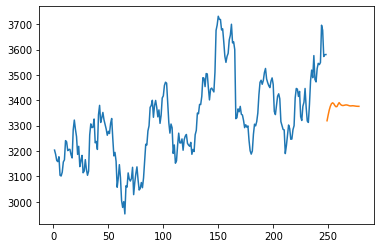

In [ ]:
plt.plot(day_new,scaler.inverse_transform(data1[:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

NameError: ignored